In [1]:
import numpy as np
import pandas as pd
import os
import pickle
import gc

# ÂàÜÂ∏ÉÁ¢∫Ë™ç„Å´‰Ωø„ÅÜ
#import pandas_profiling as pdp
# ÂèØË¶ñÂåñ
import matplotlib.pyplot as plt
# ÂâçÂá¶ÁêÜ„ÄÅÁâπÂæ¥Èáè‰ΩúÊàê - sklearn„Çí‰Ωø„ÅÜ
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
# „É¢„Éá„É™„É≥„Ç∞„ÉªÁ≤æÂ∫¶„Å®Ë©ï‰æ°ÊåáÊ®ô
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
#LGBM
import lightgbm as lgb

# NOTE matplot„Åß„ÅÆÊó•Êú¨Ë™ûÊñáÂ≠óÂåñ„Åë„ÇíËß£Ê∂à
#pip install japanize-matplotlib
import japanize_matplotlib
%matplotlib inline

import pandas as pd
pd.options.display

In [2]:
train = pd.read_csv("train.csv", index_col=0) # Â≠¶ÁøíÁî®„Éá„Éº„Çø
test = pd.read_csv("test.csv", index_col=0) # Â≠¶ÁøíÁî®„Éá„Éº„Çø   # Ë©ï‰æ°Áî®„Éá„Éº„Çø
sample_submit = pd.read_csv("sample_submission.csv", index_col=0, header=None) # ÂøúÂãüÁî®„Çµ„É≥„Éó„É´„Éï„Ç°„Ç§„É´

In [3]:
train.head()

print("„Éá„Éº„ÇøÂΩ¢Áä∂Ôºö")
print(train.shape)

print("„Éá„Éº„ÇøÊï∞Ôºö")
print(len(train))

print("„Éá„Éº„Çø„ÅÆ„Ç≥„É©„É†Êï∞")
print(len(train.columns))

print("„Éá„Éº„ÇøÂûã‰∏ÄË¶ß")
train.info()

„Éá„Éº„ÇøÂΩ¢Áä∂Ôºö
(19984, 21)
„Éá„Éº„ÇøÊï∞Ôºö
19984
„Éá„Éº„Çø„ÅÆ„Ç≥„É©„É†Êï∞
21
„Éá„Éº„ÇøÂûã‰∏ÄË¶ß
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19984 entries, 0 to 19983
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  19984 non-null  object
 1   tree_dbh    19984 non-null  int64 
 2   curb_loc    19984 non-null  object
 3   health      19984 non-null  int64 
 4   steward     5101 non-null   object
 5   guards      5041 non-null   object
 6   sidewalk    19984 non-null  object
 7   user_type   19984 non-null  object
 8   problems    7741 non-null   object
 9   spc_common  19984 non-null  object
 10  spc_latin   19984 non-null  object
 11  nta         19984 non-null  object
 12  nta_name    19984 non-null  object
 13  borocode    19984 non-null  int64 
 14  boro_ct     19984 non-null  int64 
 15  boroname    19984 non-null  object
 16  zip_city    19984 non-null  object
 17  cb_num      19984 non-null

In [4]:
train.head(10)

created_at  tree_dbh curb_loc  health steward   guards  sidewalk  \
0  2015-06-29        14   OnCurb       1     NaN      NaN    Damage   
1  2016-09-21         5   OnCurb       1    3or4  Helpful  NoDamage   
2  2015-09-13        26   OnCurb       2     NaN      NaN  NoDamage   
3  2016-05-09        15   OnCurb       0     NaN      NaN    Damage   
4  2016-06-24        23   OnCurb       1     NaN      NaN  NoDamage   
5  2015-08-11        12   OnCurb       1     NaN      NaN    Damage   
6  2015-10-24         8   OnCurb       1     NaN  Helpful    Damage   
7  2016-06-04         6   OnCurb       0     NaN      NaN  NoDamage   
8  2016-07-22        18   OnCurb       1     NaN      NaN    Damage   
9  2015-10-13        20   OnCurb       1     NaN      NaN  NoDamage   

          user_type            problems          spc_common  ...   nta  \
0         Volunteer                 NaN         English oak  ...  QN45   
1         Volunteer                 NaN  crimson king maple  ...  BX05   
2         Volunteer  StonesBranchLights         English oak  ...  SI01   
3   NYC Parks Staff                 NaN         honeylocust  ...  SI11   
4         Volunteer              Stones    London planetree  ...  MN03   
5         Volunteer                 NaN      Amur cork tree  ...  QN22   
6         Volunteer        BranchLights   littleleaf linden  ...  QN22   
7   NYC Parks Staff                 NaN              cherry  ...  QN08   
8  TreesCount Staff                 NaN        Siberian elm  ...  BK82   
9         Volunteer              Stones    London planetree  ...  QN52   

                                     nta_name borocode  boro_ct  \
0        Douglas Manor-Douglaston-Little Neck        4  4152901   
1                  Bedford Park-Fordham North        2  2039901   
2  Annadale-Huguenot-Prince's Bay-Eltingville        5  5017011   
3      Charleston-Richmond Valley-Tottenville        5  5024401   
4           Central Harlem North-Polo Grounds        1  1022102   
5                                    Flushing        4  4088901   
6                                    Flushing        4  4086500   
7                                  St. Albans        4  4052400   
8                               East New York        3  3116600   
9                               East Flushing        4  4120300   

        boroname       zip_city cb_num  st_senate  st_assem  cncldist  
0         Queens    Little Neck    411         11        25        23  
1          Bronx          Bronx    207         33        78        15  
2  Staten Island  Staten Island    503         24        62        51  
3  Staten Island  Staten Island    503         24        62        51  
4      Manhattan       New York    110         30        70         9  
5         Queens       Flushing    407         11        40        20  
6         Queens       Flushing    407         16        40        20  
7         Queens   Saint Albans    412         14        33        27  
8       Brooklyn       Brooklyn    305         18        54        37  
9         Queens       Flushing    407         16        25        20  

[10 rows x 21 columns]

„Ç≥„É©„É†Êï∞„ÅØÂÖ®ÈÉ®„Åß20ÂÄã„ÄÇ„ÉÄ„Éü„ÉºÂåñ„Åß„Åç„Çã„ÇÇ„ÅÆ„ÅØ„ÉÄ„Éü„ÉºÂåñ„ÄÅ„Åù„ÅÜ„Åß„Å™„ÅÑ„ÇÇ„ÅÆ„ÅØÂàÜÂ∏ÉÊï∞„ÅÆÂ§ö„ÅÑ„ÇÇ„ÅÆ„ÅÆ„Åø„ÇíÂèñ„ÇäÂá∫„Åô„Å™„Å©„ÅÆÂ∑•Â§´„Çí„Åó„Å¶
„Éâ„É°„Ç§„É≥Áü•Ë≠ò„Çí‰Ωø„Å£„ÅüÁâπÂæ¥Èáè„Ç®„É≥„Ç∏„Éã„Ç¢„É™„É≥„Ç∞„Çí„Åô„Çã„ÄÇ

In [5]:
print("„Éá„Éº„ÇøÂûã‰∏ÄË¶ß")
train.info()

„Éá„Éº„ÇøÂûã‰∏ÄË¶ß
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19984 entries, 0 to 19983
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  19984 non-null  object
 1   tree_dbh    19984 non-null  int64 
 2   curb_loc    19984 non-null  object
 3   health      19984 non-null  int64 
 4   steward     5101 non-null   object
 5   guards      5041 non-null   object
 6   sidewalk    19984 non-null  object
 7   user_type   19984 non-null  object
 8   problems    7741 non-null   object
 9   spc_common  19984 non-null  object
 10  spc_latin   19984 non-null  object
 11  nta         19984 non-null  object
 12  nta_name    19984 non-null  object
 13  borocode    19984 non-null  int64 
 14  boro_ct     19984 non-null  int64 
 15  boroname    19984 non-null  object
 16  zip_city    19984 non-null  object
 17  cb_num      19984 non-null  int64 
 18  st_senate   19984 non-null  int64 
 19  st_assem    19984 non-null 

tree_dbh, health, borocode, boro_ct, cb_num, st_senate, st_assem, cncldist„Åß
„Éô„Éº„Çπ„É©„Ç§„É≥„Çí‰ΩúÊàê„Åô„Çã„ÄÇ„Åù„ÅÆ‰ªñÊú¨Êù•„Å™„ÇâintÂûã„Å´„Åô„Çã„Åπ„ÅçÂÄ§„ÇÇ„Éô„Éº„Çπ„É©„Ç§„É≥„Å´Áî®„ÅÑ„Çã

tree_dbh - Êú®„ÅÆÂÜÜÂë®„ÄÇÈáèÁöÑÂ§âÊï∞
health - Êú®„ÅÆÂÅ•Â∫∑Áä∂ÊÖã„ÄÅÁõÆÁöÑÂ§âÊï∞
borocode - „Éã„É•„Éº„É®„Éº„ÇØ„ÅÆË°åÊîøÂå∫ÂàÜ„ÄÇË≥™ÁöÑÂ§âÊï∞
boro_ct - „Éã„É•„Éº„É®„Éº„ÇØÂ∏Ç„ÅÆË°åÊîøÂå∫ÂàÜÔºà„Éú„É≠„ÉºÔºâ„ÅÆÂêçÁß∞„ÄÇË≥™ÁöÑÂ§âÊï∞
cb_num - „Ç≥„Éü„É•„Éã„ÉÜ„Ç£„Éú„Éº„ÉâÁï™Âè∑„ÄÇË≥™ÁöÑÂ§âÊï∞
st_senate - Â∑û‰∏äÈô¢Âú∞Âå∫Áï™Âè∑„ÄÇË≥™ÁöÑÂ§âÊï∞
st_assem - Â∑ûË≠∞‰ºöÂú∞Âå∫Áï™Âè∑„ÄÇË≥™ÁöÑÂ§âÊï∞
cncldist - Â∏ÇË≠∞‰ºö„ÅÆÂú∞Âå∫Áï™Âè∑„ÄÇË≥™ÁöÑÂ§âÊï∞

‚Üí‰Ωø„Åà„Çã„ÅÆ„ÅØtree_dbh„Å†„Åë„ÄÇ
Ê¨°„ÅØstr„ÉªobjectÂûã„Åã„Çâint„ÉªfloatÂûã„Å´Â§âÊèõ„Åô„Çã„Åπ„Åç„ÇÇ„ÅÆ„ÇíÊé¢„Åô

steward ‚Üí Êú®„ÅÆÁÆ°ÁêÜËÄÖÊï∞ 
steward„ÅØ„ÉÄ„Éü„ÉºÂåñ„Åô„Çã„ÄÇ

tree_dbh,steward„ÅÆ‰ªñ„Å´„ÇÇ„Åæ„Åö„ÅØÁ∞°Âçò„Å´„ÉÄ„Éü„ÉºÂåñ„Åß„Åç„ÇãÂ§âÊï∞5„Å§„Çí‰Ωø„Å£„Å¶„Éô„Éº„Çπ„Çí‰ΩúÊàê„Åô„Çã

In [6]:
print("„Éá„Éº„Çø„ÅÆ„Ç≥„É©„É†Êï∞")
print(train.columns)

„Éá„Éº„Çø„ÅÆ„Ç≥„É©„É†Êï∞
Index(['created_at', 'tree_dbh', 'curb_loc', 'health', 'steward', 'guards',
       'sidewalk', 'user_type', 'problems', 'spc_common', 'spc_latin', 'nta',
       'nta_name', 'borocode', 'boro_ct', 'boroname', 'zip_city', 'cb_num',
       'st_senate', 'st_assem', 'cncldist'],
      dtype='object')


In [7]:
print("„Éá„Éº„Çø„ÅÆ„Ç≥„É©„É†Êï∞")
print(test.columns)

„Éá„Éº„Çø„ÅÆ„Ç≥„É©„É†Êï∞
Index(['created_at', 'tree_dbh', 'curb_loc', 'steward', 'guards', 'sidewalk',
       'user_type', 'problems', 'spc_common', 'spc_latin', 'nta', 'nta_name',
       'borocode', 'boro_ct', 'boroname', 'zip_city', 'cb_num', 'st_senate',
       'st_assem', 'cncldist'],
      dtype='object')


In [8]:
#ÁõÆÁöÑÂ§âÊï∞„ÅÆÂàÜÂ∏É„ÇíÁ¢∫Ë™ç
counts = train["health"].value_counts()
counts

1    15751
0     3535
2      698
Name: health, dtype: int64

In [9]:
counts = counts.sort_index()

<Axes: >

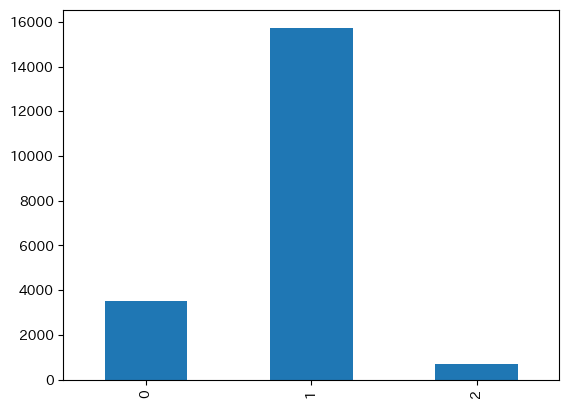

In [10]:
counts.plot.bar("health")

ÁõÆÁöÑÂ§âÊï∞„ÅØ1(good)„Åß„ÅÇ„Çã„Åì„Å®„ÅåÊÆÜ„Å©„Å†„Åå„ÄÅ0„ÇÑ2(normal, bad)„ÅåÁ¥Ñ20%„ÄÇ

OnCurb            18777
OffsetFromCurb     1207
Name: curb_loc, dtype: int64


<Axes: >

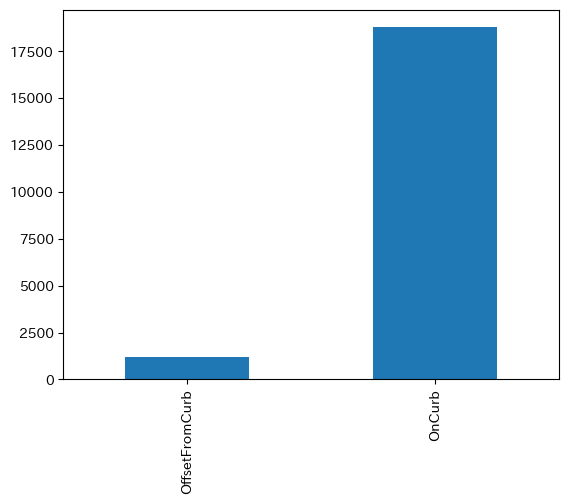

In [11]:
#ÁõÆÁöÑÂ§âÊï∞„ÅÆÂàÜÂ∏É„ÇíÁ¢∫Ë™ç
counts = train["curb_loc"].value_counts()
print(counts)
counts = counts.sort_index()
counts.plot.bar("curb_loc")

1or2       3999
3or4       1079
4orMore      23
Name: steward, dtype: int64


<Axes: >

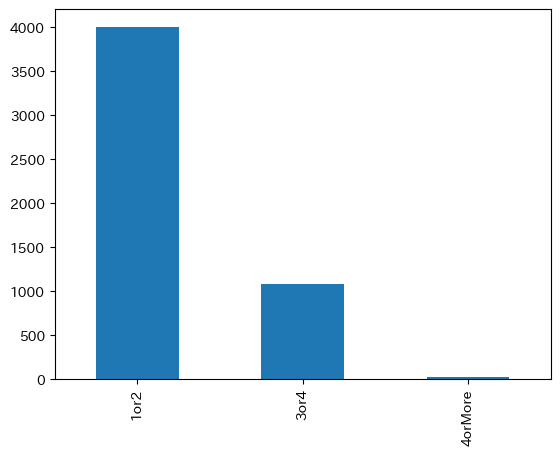

In [12]:
#ÁõÆÁöÑÂ§âÊï∞„ÅÆÂàÜÂ∏É„ÇíÁ¢∫Ë™ç
counts = train["steward"].value_counts()
print(counts)
counts = counts.sort_index()
counts.plot.bar("steward")

Helpful    3650
Unsure      737
Harmful     654
Name: guards, dtype: int64


<Axes: >

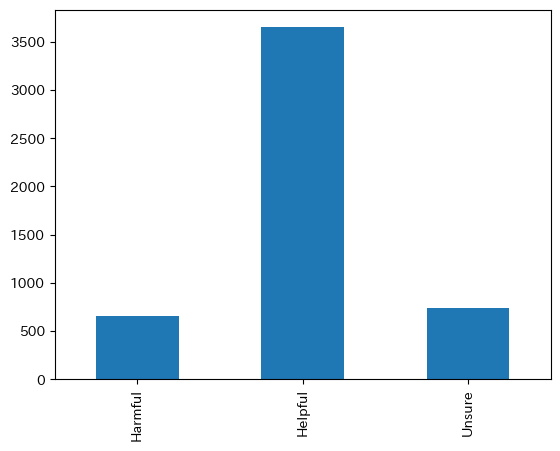

In [13]:
#ÁõÆÁöÑÂ§âÊï∞„ÅÆÂàÜÂ∏É„ÇíÁ¢∫Ë™ç
counts = train["guards"].value_counts()
print(counts)

counts = counts.sort_index()
counts.plot.bar("guards")

NoDamage    10689
Damage       9295
Name: sidewalk, dtype: int64


<Axes: >

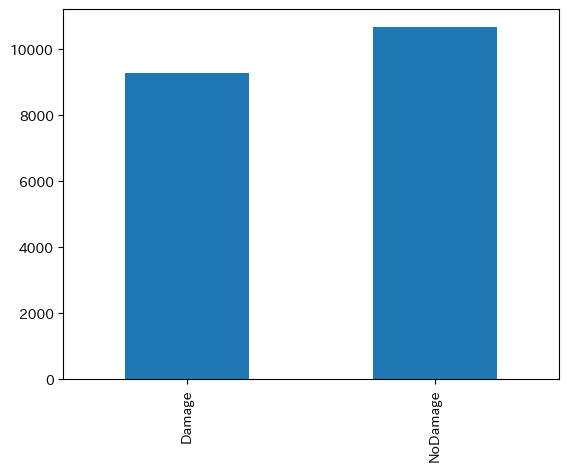

In [14]:
#ÁõÆÁöÑÂ§âÊï∞„ÅÆÂàÜÂ∏É„ÇíÁ¢∫Ë™ç
counts = train["sidewalk"].value_counts()
print(counts)

counts = counts.sort_index()
counts.plot.bar("sidewalk")

Volunteer           11189
TreesCount Staff     5795
NYC Parks Staff      3000
Name: user_type, dtype: int64


<Axes: >

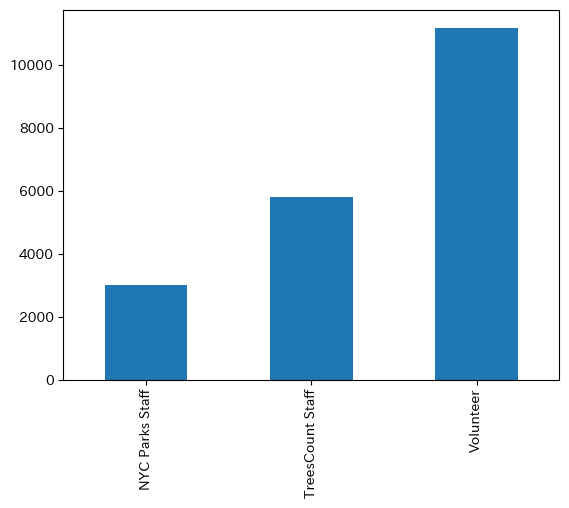

In [15]:
#ÁõÆÁöÑÂ§âÊï∞„ÅÆÂàÜÂ∏É„ÇíÁ¢∫Ë™ç
counts = train["user_type"].value_counts()
print(counts)

counts = counts.sort_index()
counts.plot.bar("user_type")

<Axes: >

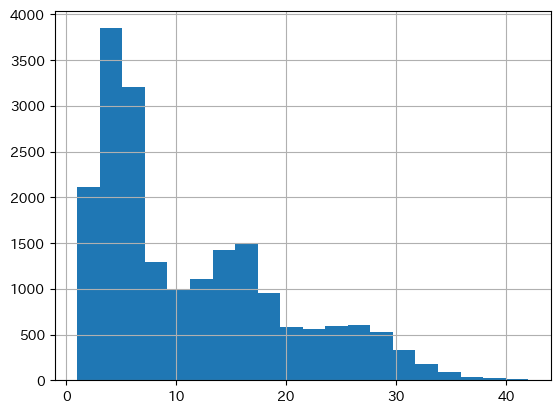

In [16]:
train["tree_dbh"].hist(bins=20)

‚Üí „Éù„Ç¢„ÇΩ„É≥ÂàÜÂ∏É„Å´Ëøë„ÅÑ„ÄÇÊåáÊï∞Âåñ„Åô„Çå„Å∞„Çà„ÇäÊúâÂäπ„Å™ÂÄ§„Å´„Å™„Çã„Åã„ÇÇÔºü

Stones                                  2219
BranchLights                            1036
StonesBranchLights                       762
BranchOther                              408
RootOther                                333
                                        ... 
StonesRootOtherTrunkOtherBranchOther       8
StonesRootOtherWiresRopeBranchOther        5
StonesMetalGratesTrunkOther                4
TrunkLightsBranchLightsBranchOther         4
WiresRopeTrunkLightsBranchLights           4
Name: problems, Length: 73, dtype: int64


<Axes: >

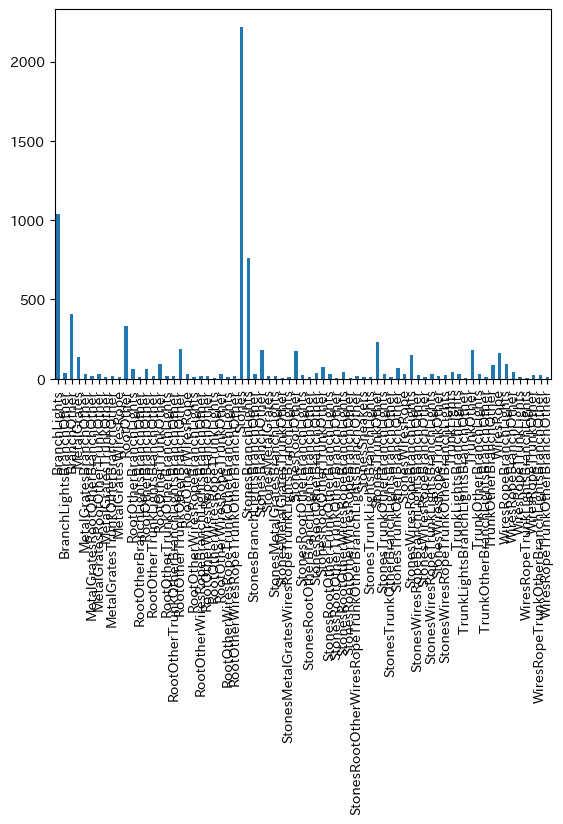

In [17]:
#ÁõÆÁöÑÂ§âÊï∞„ÅÆÂàÜÂ∏É„ÇíÁ¢∫Ë™ç
counts = train["problems"].value_counts()
print(counts)

counts = counts.sort_index()
counts.plot.bar("problems")

In [18]:
#ÁõÆÁöÑÂ§âÊï∞„ÅÆÂàÜÂ∏É„ÇíÁ¢∫Ë™ç
prob_counts = train["problems"].value_counts()
print(prob_counts)

#counts = counts.sort_index()
prob_counts[:10]

Stones                                  2219
BranchLights                            1036
StonesBranchLights                       762
BranchOther                              408
RootOther                                333
                                        ... 
StonesRootOtherTrunkOtherBranchOther       8
StonesRootOtherWiresRopeBranchOther        5
StonesMetalGratesTrunkOther                4
TrunkLightsBranchLightsBranchOther         4
WiresRopeTrunkLightsBranchLights           4
Name: problems, Length: 73, dtype: int64


Stones                            2219
BranchLights                      1036
StonesBranchLights                 762
BranchOther                        408
RootOther                          333
StonesTrunkOther                   230
RootOtherTrunkOtherBranchOther     190
TrunkOther                         183
StonesBranchOther                  180
StonesRootOther                    173
Name: problems, dtype: int64

London planetree       2237
pin oak                2140
cherry                 1689
Japanese zelkova       1470
littleleaf linden      1303
                       ... 
Chinese chestnut          3
pignut hickory            3
Kentucky yellowwood       2
pond cypress              1
Himalayan cedar           1
Name: spc_common, Length: 120, dtype: int64


<Axes: >

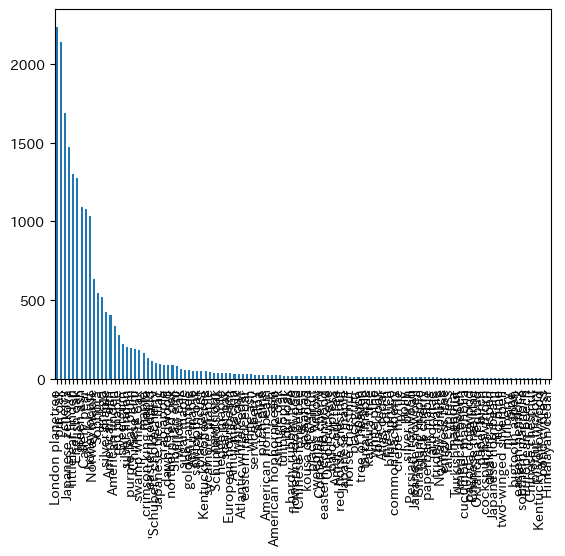

In [19]:
spc_counts = train["spc_common"].value_counts()
print(spc_counts)

#counts = counts.sort_index()
spc_counts.plot.bar("spc_common")

In [20]:
# Êú®„ÅÆÁ®ÆÈ°û - ÊúÄÂàù„ÅÆ10„Çí„ÉÄ„Éü„ÉºÂåñ„Åô„Çã
counts[:15].sum()

2216

Platanus x acerifolia    2237
Quercus palustris        2140
Prunus                   1689
Zelkova serrata          1470
Tilia cordata            1303
                         ... 
Castanea mollissima         3
Carya glabra                3
Cladrastis kentukea         2
Taxodium ascendens          1
Cedrus deodara              1
Name: spc_latin, Length: 120, dtype: int64


<Axes: >

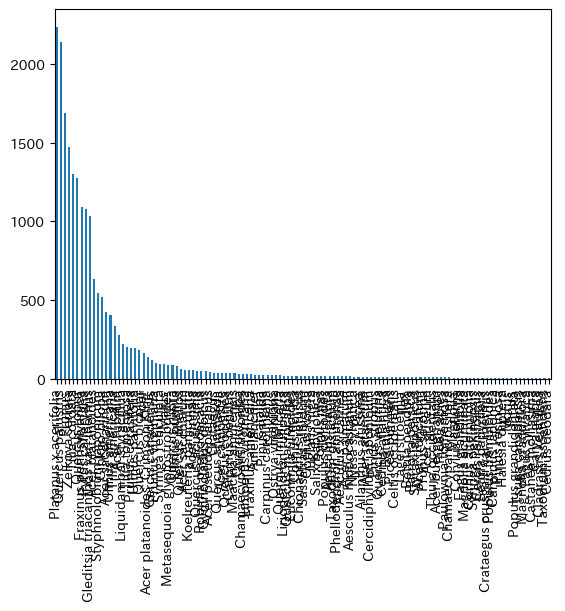

In [21]:
counts = train["spc_latin"].value_counts()
print(counts)

#counts = counts.sort_index()
counts.plot.bar("spc_latin")

In [22]:
# Êú®„ÅÆÁ®ÆÈ°û - ÊúÄÂàù„ÅÆ10„Çí„ÉÄ„Éü„ÉºÂåñ„Åô„Çã
counts[:10]

Platanus x acerifolia                 2237
Quercus palustris                     2140
Prunus                                1689
Zelkova serrata                       1470
Tilia cordata                         1303
Quercus robur                         1277
Fraxinus pennsylvanica                1089
Pyrus calleryana                      1076
Gleditsia triacanthos var. inermis    1034
Acer platanoides                       634
Name: spc_latin, dtype: int64

SI54    368
SI11    359
BK82    326
BK45    306
SI32    306
       ... 
MN17      6
MN21      5
QN68      4
BK27      2
MN20      1
Name: nta, Length: 187, dtype: int64


<Axes: >

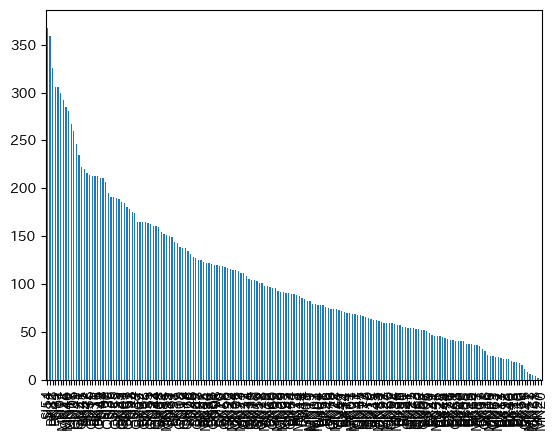

In [23]:
#Âú∞ÂüüÔºàNeighborhood Tabulation AreaÔºâ„ÅÆÁï•Áß∞
counts = train["nta"].value_counts()
print(counts)

#counts = counts.sort_index()
counts.plot.bar("nta")

Great Kills                                       368
Charleston-Richmond Valley-Tottenville            359
East New York                                     326
Georgetown-Marine Park-Bergen Beach-Mill Basin    306
Rossville-Woodrow                                 306
                                                 ... 
Midtown-Midtown South                               6
Gramercy                                            5
Queensbridge-Ravenswood-Long Island City            4
Bath Beach                                          2
Murray Hill-Kips Bay                                1
Name: nta_name, Length: 187, dtype: int64


<Axes: >

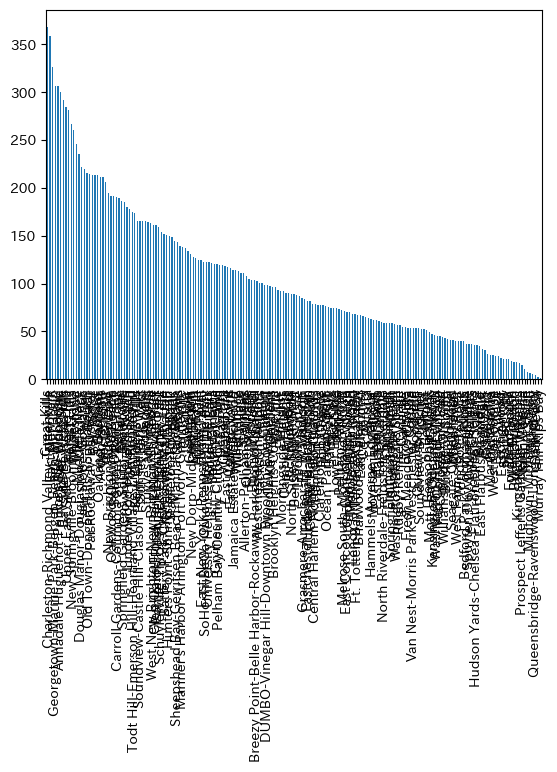

In [24]:
#Âú∞ÂüüÔºàNeighborhood Tabulation AreaÔºâ„ÅÆÁï•Áß∞
counts = train["nta_name"].value_counts()
print(counts)

#counts = counts.sort_index()
counts.plot.bar("nta_name")

In [25]:
# vill, beach, side, hill, park, water, bay, garden„Å™„Å©Êú®„Å´ÂΩ±Èüø„Åó„Åù„ÅÜ„Å™ÂêçÁß∞„ÇíÊäΩÂá∫„Åô„Çã„ÅãÔºüÔºü
counts[:30]

Great Kills                                       368
Charleston-Richmond Valley-Tottenville            359
East New York                                     326
Georgetown-Marine Park-Bergen Beach-Mill Basin    306
Rossville-Woodrow                                 306
Annadale-Huguenot-Prince's Bay-Eltingville        300
Upper West Side                                   292
Bayside-Bayside Hills                             285
Upper East Side-Carnegie Hill                     281
Forest Hills                                      267
New Springville-Bloomfield-Travis                 260
Whitestone                                        246
Middle Village                                    235
Douglas Manor-Douglaston-Little Neck              222
Park Slope-Gowanus                                220
Flatbush                                          216
Old Town-Dongan Hills-South Beach                 214
Far Rockaway-Bayswater                            213
Bay Ridge                   

4    6572
3    5119
5    3735
1    2288
2    2270
Name: borocode, dtype: int64


<Axes: >

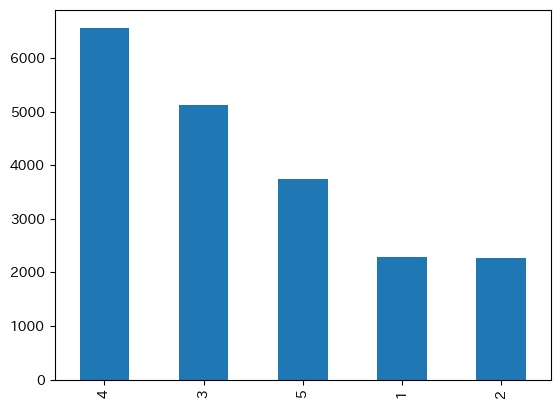

In [26]:
#„Éã„É•„Éº„É®„Éº„ÇØÂ∏Ç„ÅÆË°åÊîøÂå∫ÂàÜÔºà„Éú„É≠„ÉºÔºâ„ÅÆ„Ç≥„Éº„Éâ
#„Éú„É≠„Ç≥„Éº„Éâ„ÅØÈùûÂ∏∏„Å´ÊúâÁõä„Åù„ÅÜ„ÄÇÈáèÁöÑÂ§âÊï∞„Å´„Åô„Çã
counts = train["borocode"].value_counts()
print(counts)

#counts = counts.sort_index()
counts.plot.bar("borocode")

5022600    204
1031704    149
5020804    126
5005900    112
5020801    103
          ... 
4026300      1
2041800      1
2011900      1
3039100      1
3066200      1
Name: boro_ct, Length: 1193, dtype: int64


<Axes: >

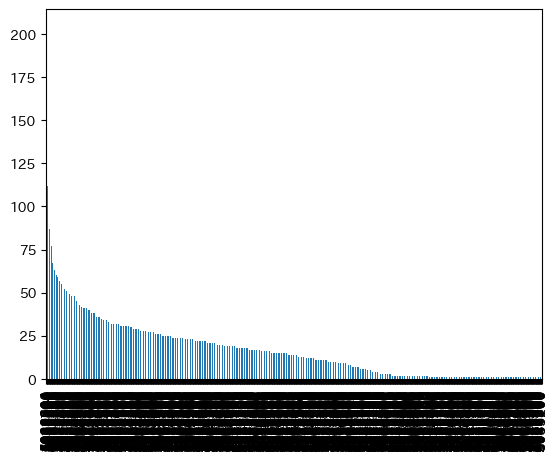

In [27]:
counts = train["boro_ct"].value_counts()
print(counts)

#counts = counts.sort_index()
counts.plot.bar("boro_ct")

Queens           6572
Brooklyn         5119
Staten Island    3735
Manhattan        2288
Bronx            2270
Name: boroname, dtype: int64


<Axes: >

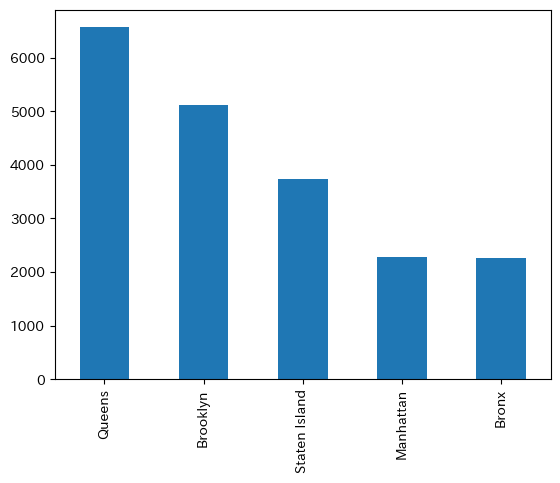

In [28]:
#„ÄÄ„Éã„É•„Éº„É®„Éº„ÇØÂ∏Ç„ÅÆË°åÊîøÂå∫ÂàÜÔºà„Éú„É≠„ÉºÔºâ„ÅÆÂêçÁß∞
#„ÄÄ„Éú„É≠„ÉºÂêçÁß∞„ÅØÊúâÂäπ„Åù„ÅÜ„ÄÇ„ÉÄ„Éü„ÉºÂ§âÊï∞„Å´„Åô„Çã

counts = train["boroname"].value_counts()
print(counts)

#counts = counts.sort_index()
counts.plot.bar("boroname")

Brooklyn               5119
Staten Island          3735
Bronx                  2270
New York               2267
Jamaica                 660
Flushing                615
Ridgewood               331
Oakland Gardens         281
Whitestone              252
Springfield Gardens     248
Forest Hills            248
Far Rockaway            241
Fresh Meadows           226
Little Neck             222
Bayside                 218
Middle Village          213
Rosedale                186
Howard Beach            178
Queens Village          173
Astoria                 161
South Ozone Park        145
East Elmhurst           143
Bellerose               141
College Point           135
Maspeth                 129
Ozone Park              129
Glen Oaks               128
Long Island City        114
Woodside                108
Richmond Hill           104
Elmhurst                104
Cambria Heights          91
Rockaway Park            84
Kew Gardens              68
Saint Albans             68
Hollis              

<Axes: >

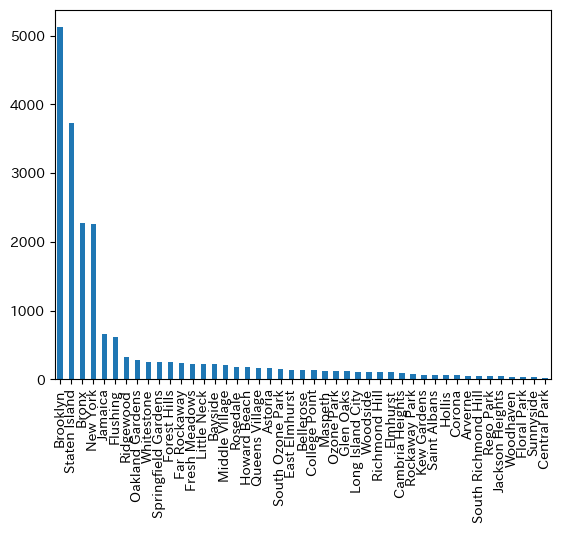

In [29]:
#„ÄÄÈÉµ‰æøÁï™Âè∑„Å´Èñ¢ÈÄ£„Åô„ÇãÈÉΩÂ∏Ç„Åæ„Åü„ÅØÂú∞Âå∫
#„ÄÄÊúÄÂàù„ÅÆ5-10ÂÄã„Çí„ÉÄ„Éü„ÉºÂåñ„Åô„Çã„Åã??
# È†ªÂ∫¶„ÇíÈáèÁöÑÂ§âÊï∞„Å´„Åô„Çã„ÄÅ„Å™„Å©„Çà„ÇäÊúâÂäπ„Å™„ÉÄ„Éü„ÉºÂåñ„ÇÇÊ§úË®é‰∏≠

counts = train["zip_city"].value_counts()
print(counts)

#counts = counts.sort_index()
counts.plot.bar("zip_city")

503    1735
501    1140
413    1026
502     860
411     843
407     778
405     672
305     620
408     560
412     517
318     505
301     503
410     486
108     442
107     435
306     414
303     397
302     379
414     379
209     358
210     353
315     338
314     303
406     296
212     271
307     263
312     257
101     252
211     250
310     250
402     229
409     225
401     214
111     184
403     175
316     174
404     172
112     170
103     156
110     149
205     148
208     141
311     140
206     140
109     139
317     136
202     135
104     134
102     133
308     133
204     129
203     128
201     128
309     119
304     117
207      89
106      87
313      71
105       7
Name: cb_num, dtype: int64


<Axes: >

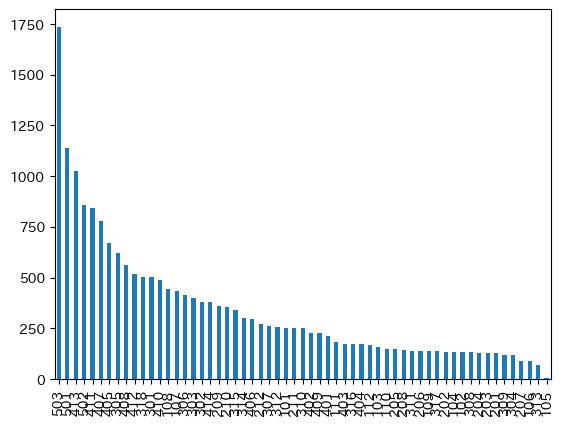

In [30]:
#„ÄÄ„Éã„É•„Éº„É®„Éº„ÇØÂ∏Ç„ÅÆË°åÊîøÂå∫ÂàÜÔºà„Éú„É≠„ÉºÔºâ„ÅÆÂêçÁß∞
#„ÄÄ„Éú„É≠„ÉºÂêçÁß∞„ÅØÊúâÂäπ„Åù„ÅÜ„ÄÇ„ÉÄ„Éü„ÉºÂ§âÊï∞„Å´„Åô„Çã

counts = train["cb_num"].value_counts()
print(counts)

#counts = counts.sort_index()
counts.plot.bar("cb_num")

24    2905
11    1885
15    1503
23    1035
10    1028
34     965
25     963
14     830
19     771
26     750
22     711
18     632
21     560
16     550
28     508
32     480
30     478
17     466
20     417
29     400
13     399
31     388
27     380
12     377
33     308
36     295
Name: st_senate, dtype: int64


<Axes: >

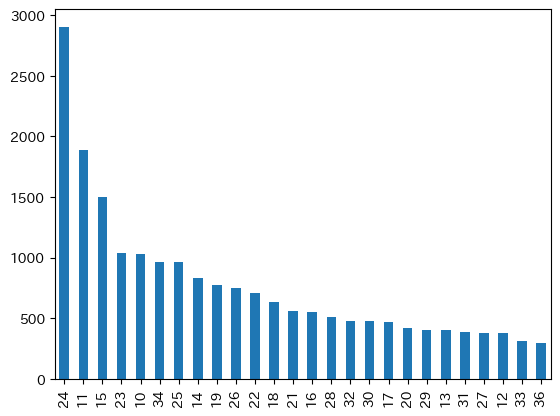

In [31]:
#„ÄÄ„Éã„É•„Éº„É®„Éº„ÇØÂ∏Ç„ÅÆË°åÊîøÂå∫ÂàÜÔºà„Éú„É≠„ÉºÔºâ„ÅÆÂêçÁß∞
#„ÄÄ„Éú„É≠„ÉºÂêçÁß∞„ÅØÊúâÂäπ„Åù„ÅÜ„ÄÇ„ÉÄ„Éü„ÉºÂ§âÊï∞„Å´„Åô„Çã

counts = train["st_senate"].value_counts()
print(counts)

#counts = counts.sort_index()
counts.plot.bar("st_senate")

62    1459
64     827
63     789
61     783
26     696
      ... 
47     107
74      92
72      89
78      88
49      54
Name: st_assem, Length: 65, dtype: int64


<Axes: >

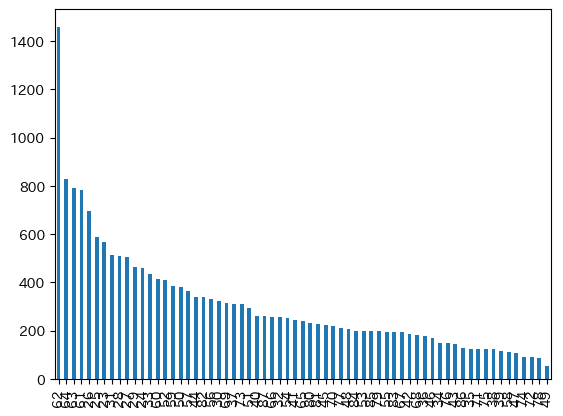

In [32]:
#„ÄÄ„Éã„É•„Éº„É®„Éº„ÇØÂ∏Ç„ÅÆË°åÊîøÂå∫ÂàÜÔºà„Éú„É≠„ÉºÔºâ„ÅÆÂêçÁß∞
#„ÄÄ„Éú„É≠„ÉºÂêçÁß∞„ÅØÊúâÂäπ„Åù„ÅÜ„ÄÇ„ÉÄ„Éü„ÉºÂ§âÊï∞„Å´„Åô„Çã

counts = train["st_assem"].value_counts()
print(counts)

#counts = counts.sort_index()
counts.plot.bar("st_assem")

51    1604
50    1093
49    1038
19     889
23     849
31     788
30     660
24     539
32     538
33     529
13     485
46     449
39     429
35     413
29     413
42     396
27     393
4      382
36     371
28     365
6      355
37     347
18     337
17     334
20     326
1      320
43     282
48     278
9      270
38     269
41     267
3      265
34     264
44     256
11     249
12     245
45     239
47     233
7      229
26     214
15     207
22     194
25     181
8      177
14     175
21     169
16     163
40     151
10     140
5      127
2       98
Name: cncldist, dtype: int64


<Axes: >

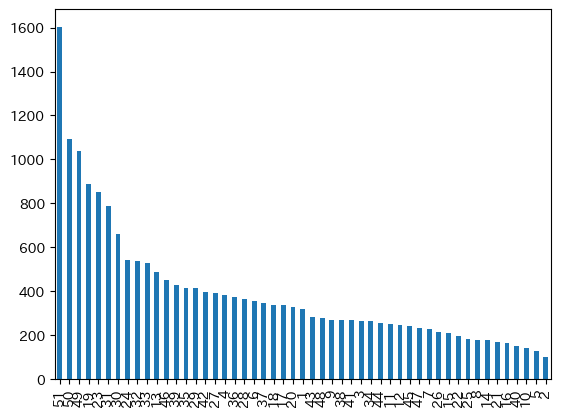

In [33]:
#„ÄÄ„Éã„É•„Éº„É®„Éº„ÇØÂ∏Ç„ÅÆË°åÊîøÂå∫ÂàÜÔºà„Éú„É≠„ÉºÔºâ„ÅÆÂêçÁß∞
#„ÄÄ„Éú„É≠„ÉºÂêçÁß∞„ÅØÊúâÂäπ„Åù„ÅÜ„ÄÇ„ÉÄ„Éü„ÉºÂ§âÊï∞„Å´„Åô„Çã

counts = train["cncldist"].value_counts()
print(counts)

#counts = counts.sort_index()
counts.plot.bar("cncldist")

In [34]:
len(counts)

51

# ÂâçÂá¶ÁêÜ

# „Éô„Éº„Çπ„É©„Ç§„É≥‰ΩúÊàê„Å´Áî®„ÅÑ„ÇãÂ§âÊï∞
tree_dbh
curb_loc
steward
guards
sidewalk
user_type

## ÊôÇÊúüÂàó„Éá„Éº„Çø
„ÉªË®òÈå≤„Åï„Çå„ÅüÂπ¥„ÉªÊúà„ÇíÂàÜÊûê„Å´Âê´„ÇÅ„Çã
„ÉªÂ≠£ÁØÄ„ÇíË™¨ÊòéÂ§âÊï∞„Å´Âê´„ÇÅ„Çã

In [35]:
print("„Éá„Éº„ÇøÂûã‰∏ÄË¶ß")
train.info()

„Éá„Éº„ÇøÂûã‰∏ÄË¶ß
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19984 entries, 0 to 19983
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  19984 non-null  object
 1   tree_dbh    19984 non-null  int64 
 2   curb_loc    19984 non-null  object
 3   health      19984 non-null  int64 
 4   steward     5101 non-null   object
 5   guards      5041 non-null   object
 6   sidewalk    19984 non-null  object
 7   user_type   19984 non-null  object
 8   problems    7741 non-null   object
 9   spc_common  19984 non-null  object
 10  spc_latin   19984 non-null  object
 11  nta         19984 non-null  object
 12  nta_name    19984 non-null  object
 13  borocode    19984 non-null  int64 
 14  boro_ct     19984 non-null  int64 
 15  boroname    19984 non-null  object
 16  zip_city    19984 non-null  object
 17  cb_num      19984 non-null  int64 
 18  st_senate   19984 non-null  int64 
 19  st_assem    19984 non-null 

In [36]:
train.head(5)

created_at  tree_dbh curb_loc  health steward   guards  sidewalk  \
0  2015-06-29        14   OnCurb       1     NaN      NaN    Damage   
1  2016-09-21         5   OnCurb       1    3or4  Helpful  NoDamage   
2  2015-09-13        26   OnCurb       2     NaN      NaN  NoDamage   
3  2016-05-09        15   OnCurb       0     NaN      NaN    Damage   
4  2016-06-24        23   OnCurb       1     NaN      NaN  NoDamage   

         user_type            problems          spc_common  ...   nta  \
0        Volunteer                 NaN         English oak  ...  QN45   
1        Volunteer                 NaN  crimson king maple  ...  BX05   
2        Volunteer  StonesBranchLights         English oak  ...  SI01   
3  NYC Parks Staff                 NaN         honeylocust  ...  SI11   
4        Volunteer              Stones    London planetree  ...  MN03   

                                     nta_name borocode  boro_ct  \
0        Douglas Manor-Douglaston-Little Neck        4  4152901   
1                  Bedford Park-Fordham North        2  2039901   
2  Annadale-Huguenot-Prince's Bay-Eltingville        5  5017011   
3      Charleston-Richmond Valley-Tottenville        5  5024401   
4           Central Harlem North-Polo Grounds        1  1022102   

        boroname       zip_city cb_num  st_senate  st_assem  cncldist  
0         Queens    Little Neck    411         11        25        23  
1          Bronx          Bronx    207         33        78        15  
2  Staten Island  Staten Island    503         24        62        51  
3  Staten Island  Staten Island    503         24        62        51  
4      Manhattan       New York    110         30        70         9  

[5 rows x 21 columns]

In [37]:
train["datetime"] = pd.to_datetime(train["created_at"], format="%Y-%m-%d")
train.head(2)

created_at  tree_dbh curb_loc  health steward   guards  sidewalk  \
0  2015-06-29        14   OnCurb       1     NaN      NaN    Damage   
1  2016-09-21         5   OnCurb       1    3or4  Helpful  NoDamage   

   user_type problems          spc_common  ...  \
0  Volunteer      NaN         English oak  ...   
1  Volunteer      NaN  crimson king maple  ...   

                               nta_name borocode  boro_ct  boroname  \
0  Douglas Manor-Douglaston-Little Neck        4  4152901    Queens   
1            Bedford Park-Fordham North        2  2039901     Bronx   

      zip_city cb_num st_senate  st_assem  cncldist   datetime  
0  Little Neck    411        11        25        23 2015-06-29  
1        Bronx    207        33        78        15 2016-09-21  

[2 rows x 22 columns]

In [38]:
#Âπ¥„ÉªÊúà„ÇíÂèñÂæó
train["datetime"].dt.year

0        2015
1        2016
2        2015
3        2016
4        2016
         ... 
19979    2016
19980    2016
19981    2015
19982    2016
19983    2015
Name: datetime, Length: 19984, dtype: int64

In [39]:
train["year"] = train["datetime"].dt.year
train.head(2)

created_at  tree_dbh curb_loc  health steward   guards  sidewalk  \
0  2015-06-29        14   OnCurb       1     NaN      NaN    Damage   
1  2016-09-21         5   OnCurb       1    3or4  Helpful  NoDamage   

   user_type problems          spc_common  ... borocode  boro_ct boroname  \
0  Volunteer      NaN         English oak  ...        4  4152901   Queens   
1  Volunteer      NaN  crimson king maple  ...        2  2039901    Bronx   

      zip_city  cb_num st_senate st_assem  cncldist   datetime  year  
0  Little Neck     411        11       25        23 2015-06-29  2015  
1        Bronx     207        33       78        15 2016-09-21  2016  

[2 rows x 23 columns]

In [40]:
train["month"] = train["datetime"].dt.month
train.head(2)

created_at  tree_dbh curb_loc  health steward   guards  sidewalk  \
0  2015-06-29        14   OnCurb       1     NaN      NaN    Damage   
1  2016-09-21         5   OnCurb       1    3or4  Helpful  NoDamage   

   user_type problems          spc_common  ...  boro_ct boroname     zip_city  \
0  Volunteer      NaN         English oak  ...  4152901   Queens  Little Neck   
1  Volunteer      NaN  crimson king maple  ...  2039901    Bronx        Bronx   

   cb_num  st_senate st_assem cncldist   datetime  year  month  
0     411         11       25       23 2015-06-29  2015      6  
1     207         33       78       15 2016-09-21  2016      9  

[2 rows x 24 columns]

In [41]:
train["year_month"] = train["datetime"].dt.strftime("%Y-%m")
train.head(2)

created_at  tree_dbh curb_loc  health steward   guards  sidewalk  \
0  2015-06-29        14   OnCurb       1     NaN      NaN    Damage   
1  2016-09-21         5   OnCurb       1    3or4  Helpful  NoDamage   

   user_type problems          spc_common  ... boroname     zip_city cb_num  \
0  Volunteer      NaN         English oak  ...   Queens  Little Neck    411   
1  Volunteer      NaN  crimson king maple  ...    Bronx        Bronx    207   

   st_senate  st_assem cncldist   datetime  year  month  year_month  
0         11        25       23 2015-06-29  2015      6     2015-06  
1         33        78       15 2016-09-21  2016      9     2016-09  

[2 rows x 25 columns]

In [42]:
# NOTE Âπ¥Êúà„ÇíÂ≠£ÁØÄ„Å´Â§âÊèõ
def to_season(num):
    season = "winter"
    if (3 <= num <= 5):
        season = "spring"
    elif (6 <= num <= 8):
        season = "summer"
    elif (9 <= num <= 11):
        season = "autumn"
    
    return season

In [43]:
train["season"] = pd.Categorical(train["month"].apply(to_season))
train.head(2)

created_at  tree_dbh curb_loc  health steward   guards  sidewalk  \
0  2015-06-29        14   OnCurb       1     NaN      NaN    Damage   
1  2016-09-21         5   OnCurb       1    3or4  Helpful  NoDamage   

   user_type problems          spc_common  ...     zip_city cb_num st_senate  \
0  Volunteer      NaN         English oak  ...  Little Neck    411        11   
1  Volunteer      NaN  crimson king maple  ...        Bronx    207        33   

   st_assem  cncldist   datetime  year  month  year_month  season  
0        25        23 2015-06-29  2015      6     2015-06  summer  
1        78        15 2016-09-21  2016      9     2016-09  autumn  

[2 rows x 26 columns]

In [44]:
# Êúà„Åî„Å®„ÅÆÂπ≥ÂùáÊúÄÈ´òÊ∞óÊ∏©„ÄÅÂπ≥ÂùáÊúÄ‰ΩéÊ∞óÊ∏©„ÄÅÈôçÊ∞¥Êó•Êï∞„ÄÅÈôçÊ∞¥Èáè„ÄÅÊó•ÁÖßÊôÇÈñì„ÇíÂ§âÊï∞„Å´ËøΩÂä†„Åô„Çã„Äå
avg_highf = {1:39, 2:42, 3:50, 4:60, 5:71, 6:79, 7:85, 8:83, 9:76, 10:65, 11:54, 12:44}
avg_lowf = {1:26, 2:29, 3:35, 4:44, 5:55, 6:64, 7:70, 8:69, 9:61, 10:50, 11:41, 12:32}
days_prcp = {1:11, 2:10, 3:12, 4:11, 5:11, 6:10, 7:11, 8:10, 9:8, 10:8, 11:9, 12:10}
inch_prcp = {1:3.90, 2:2.95, 3:4.06, 4:3.94, 5:4.45, 6:3.50, 7:4.53, 8:4.13, 9:3.98, 10:3.39, 11:3.82, 12:3.58}
hours_snsn = {1:154, 2:171, 3:213, 4:237, 5:268, 6:289, 7:302, 8:271, 9:235, 10:213, 11:169, 12:155}

train["avg_highf"] = train["month"].map(avg_highf) 
train["avg_lowf"] = train["month"].map(avg_lowf) 
train["days_prcp"] = train["month"].map(days_prcp) 
train["inch_prcp"] = train["month"].map(inch_prcp) 
train["hours_snsn"] = train["month"].map(hours_snsn) 
train.head(10)

created_at  tree_dbh curb_loc  health steward   guards  sidewalk  \
0  2015-06-29        14   OnCurb       1     NaN      NaN    Damage   
1  2016-09-21         5   OnCurb       1    3or4  Helpful  NoDamage   
2  2015-09-13        26   OnCurb       2     NaN      NaN  NoDamage   
3  2016-05-09        15   OnCurb       0     NaN      NaN    Damage   
4  2016-06-24        23   OnCurb       1     NaN      NaN  NoDamage   
5  2015-08-11        12   OnCurb       1     NaN      NaN    Damage   
6  2015-10-24         8   OnCurb       1     NaN  Helpful    Damage   
7  2016-06-04         6   OnCurb       0     NaN      NaN  NoDamage   
8  2016-07-22        18   OnCurb       1     NaN      NaN    Damage   
9  2015-10-13        20   OnCurb       1     NaN      NaN  NoDamage   

          user_type            problems          spc_common  ...   datetime  \
0         Volunteer                 NaN         English oak  ... 2015-06-29   
1         Volunteer                 NaN  crimson king maple  ... 2016-09-21   
2         Volunteer  StonesBranchLights         English oak  ... 2015-09-13   
3   NYC Parks Staff                 NaN         honeylocust  ... 2016-05-09   
4         Volunteer              Stones    London planetree  ... 2016-06-24   
5         Volunteer                 NaN      Amur cork tree  ... 2015-08-11   
6         Volunteer        BranchLights   littleleaf linden  ... 2015-10-24   
7   NYC Parks Staff                 NaN              cherry  ... 2016-06-04   
8  TreesCount Staff                 NaN        Siberian elm  ... 2016-07-22   
9         Volunteer              Stones    London planetree  ... 2015-10-13   

   year month  year_month  season avg_highf avg_lowf  days_prcp  inch_prcp  \
0  2015     6     2015-06  summer        79       64         10       3.50   
1  2016     9     2016-09  autumn        76       61          8       3.98   
2  2015     9     2015-09  autumn        76       61          8       3.98   
3  2016     5     2016-05  spring        71       55         11       4.45   
4  2016     6     2016-06  summer        79       64         10       3.50   
5  2015     8     2015-08  summer        83       69         10       4.13   
6  2015    10     2015-10  autumn        65       50          8       3.39   
7  2016     6     2016-06  summer        79       64         10       3.50   
8  2016     7     2016-07  summer        85       70         11       4.53   
9  2015    10     2015-10  autumn        65       50          8       3.39   

   hours_snsn  
0         289  
1         235  
2         235  
3         268  
4         289  
5         271  
6         213  
7         289  
8         302  
9         213  

[10 rows x 31 columns]

In [45]:
x_list = ["tree_dbh","curb_loc","steward","guards","sidewalk","user_type","problems","bool_problems","spc_common","nta","borocode","boro_ct", "zip_city", "cb_num", "st_senate", "st_assem", "cncldist","year","month","season","hours_snsn"]
#x_list = ["tree_dbh","curb_loc","steward","guards","sidewalk","user_type","problems","bool_problems","spc_common","nta","borocode","boro_ct", "zip_city", "cb_num", "st_senate", "st_assem", "cncldist","year","month","season","avg_highf", "avg_lowf", "days_prcp", "inch_prcp", "hours_snsn"]
# x_list = ["tree_dbh","curb_loc","steward","guards","sidewalk","user_type","problems","bool_problems","spc_common","nta","borocode","boro_ct", "zip_city", "cb_num", "st_senate", "st_assem", "cncldist"]
y_list = ["health"]
dummy_list = ["curb_loc","steward","guards","sidewalk","user_type","borocode"]

# „Ç¢„É≥„ÉÄ„Éº„Çµ„É≥„Éó„É™„É≥„Ç∞
ÈÅéÂ≠¶ÁøíÂØæÁ≠ñ„Å®„Åó„Å¶train['health']„Åã„Çâ1„ÅÆÊï∞„ÇíÊ∏õ„Çâ„Åô
‚Üí „Åì„ÅÆÊñπÊ≥ï„ÅØÈÄÜÂäπÊûú„ÄÇ

In [46]:
train_values = train['health'].value_counts()
train_values

1    15751
0     3535
2      698
Name: health, dtype: int64

In [47]:
print("1„ÅÆÂâ≤ÂêàÔºö")
print("" + str(float( train_values[1] / train['health'].value_counts().sum() ) * 100) + " %")

print("0„ÅÆÂâ≤ÂêàÔºö")
print("" + str(float( train_values[0] / train['health'].value_counts().sum() ) * 100) + " %")

print("2„ÅÆÂâ≤ÂêàÔºö")
print("" + str(float( train_values[2] / train['health'].value_counts().sum() ) * 100) + " %")

1„ÅÆÂâ≤ÂêàÔºö
78.81805444355484 %
0„ÅÆÂâ≤ÂêàÔºö
17.689151321056844 %
2„ÅÆÂâ≤ÂêàÔºö
3.4927942353883106 %


## Êú®„ÅÆÂÅ•Â∫∑Áä∂ÊÖãÔºàÁõÆÁöÑÂ§âÊï∞Ôºâ
0:FairÔºàÊôÆÈÄöÔºâ 1:GoodÔºàËâØ„ÅÑÔºâ 2:PoorÔºàÊÇ™„ÅÑÔºâ
0:ËâØ„ÅÑ„ÄÅ1:ÊôÆÈÄö„ÄÅ2:ÊÇ™„ÅÑ„ÄÅ„Å®„ÅÑ„ÅÜÂÄ§„Å´ÁΩÆ„ÅçÊèõ„Åà„Çã

In [48]:
train['health'] = train['health'].map({0:1, 1:0, 2:2})
train.head(5)

created_at  tree_dbh curb_loc  health steward   guards  sidewalk  \
0  2015-06-29        14   OnCurb       0     NaN      NaN    Damage   
1  2016-09-21         5   OnCurb       0    3or4  Helpful  NoDamage   
2  2015-09-13        26   OnCurb       2     NaN      NaN  NoDamage   
3  2016-05-09        15   OnCurb       1     NaN      NaN    Damage   
4  2016-06-24        23   OnCurb       0     NaN      NaN  NoDamage   

         user_type            problems          spc_common  ...   datetime  \
0        Volunteer                 NaN         English oak  ... 2015-06-29   
1        Volunteer                 NaN  crimson king maple  ... 2016-09-21   
2        Volunteer  StonesBranchLights         English oak  ... 2015-09-13   
3  NYC Parks Staff                 NaN         honeylocust  ... 2016-05-09   
4        Volunteer              Stones    London planetree  ... 2016-06-24   

   year month  year_month  season avg_highf avg_lowf  days_prcp  inch_prcp  \
0  2015     6     2015-06  summer        79       64         10       3.50   
1  2016     9     2016-09  autumn        76       61          8       3.98   
2  2015     9     2015-09  autumn        76       61          8       3.98   
3  2016     5     2016-05  spring        71       55         11       4.45   
4  2016     6     2016-06  summer        79       64         10       3.50   

   hours_snsn  
0         289  
1         235  
2         235  
3         268  
4         289  

[5 rows x 31 columns]

In [49]:
# problems„ÇíboolÂ§âÊèõ ‚Üí ÂïèÈ°å„Åå„ÅÇ„Çã„ÅãÂê¶„Åã„ÅÆ„ÉÄ„Éü„ÉºÂ§âÊï∞„Å´„Åô„Çã
train['bool_problems'] = train['problems'].apply(lambda x: 0 if x=='NULL' else 1)
train.head(2)

created_at  tree_dbh curb_loc  health steward   guards  sidewalk  \
0  2015-06-29        14   OnCurb       0     NaN      NaN    Damage   
1  2016-09-21         5   OnCurb       0    3or4  Helpful  NoDamage   

   user_type problems          spc_common  ...  year month year_month  season  \
0  Volunteer      NaN         English oak  ...  2015     6    2015-06  summer   
1  Volunteer      NaN  crimson king maple  ...  2016     9    2016-09  autumn   

   avg_highf avg_lowf days_prcp  inch_prcp  hours_snsn  bool_problems  
0         79       64        10       3.50         289              1  
1         76       61         8       3.98         235              1  

[2 rows x 32 columns]

In [50]:
#„ÄÄË™¨ÊòéÂ§âÊï∞+ÁõÆÁöÑÂ§âÊï∞„Å®„Éê„É™„Éá„Éº„Ç∑„Éß„É≥Ë®≠Ë®à
X_train, y_train = train[x_list], train[y_list]
X_train.head(2)

tree_dbh curb_loc steward   guards  sidewalk  user_type problems  \
0        14   OnCurb     NaN      NaN    Damage  Volunteer      NaN   
1         5   OnCurb    3or4  Helpful  NoDamage  Volunteer      NaN   

   bool_problems          spc_common   nta  ...  boro_ct     zip_city cb_num  \
0              1         English oak  QN45  ...  4152901  Little Neck    411   
1              1  crimson king maple  BX05  ...  2039901        Bronx    207   

   st_senate  st_assem  cncldist  year  month  season hours_snsn  
0         11        25        23  2015      6  summer        289  
1         33        78        15  2016      9  autumn        235  

[2 rows x 21 columns]

In [51]:
column_means = train.groupby("datetime")["health"].mean("health")
column_means

datetime
2015-05-19    0.266667
2015-05-20    0.210526
2015-05-21    0.500000
2015-05-22    0.600000
2015-05-23    0.500000
                ...   
2016-09-24    0.125000
2016-09-25    0.333333
2016-09-26    0.200000
2016-09-27    0.142857
2016-10-05    0.000000
Name: health, Length: 447, dtype: float64

In [52]:
column_means = train.groupby("year")["health"].mean("health")
column_means

year
2015    0.242367
2016    0.260906
Name: health, dtype: float64

In [53]:
column_means = train.groupby("month")["health"].mean("health")
column_means

month
1     0.279793
2     0.272109
3     0.206704
4     0.182222
5     0.296552
6     0.280201
7     0.245327
8     0.237237
9     0.260163
10    0.242063
11    0.222222
12    0.227397
Name: health, dtype: float64

In [54]:
column_means = train.groupby("year_month")["health"].mean("health")
column_means

year_month
2015-05    0.294737
2015-06    0.270545
2015-07    0.246997
2015-08    0.229905
2015-09    0.257388
2015-10    0.242352
2015-11    0.222222
2015-12    0.227397
2016-01    0.279793
2016-02    0.272109
2016-03    0.206704
2016-04    0.182222
2016-05    0.297436
2016-06    0.291667
2016-07    0.241530
2016-08    0.253937
2016-09    0.268919
2016-10    0.000000
Name: health, dtype: float64

Êú®„ÅÆÁä∂ÊÖã„ÅØÂÜ¨„ÉªÊ¢ÖÈõ®„ÉªÂ§èÈñã„Åë„Å´ÊÇ™„Åè„Å™„Çã?

- „Åù„ÅÆÊúà„ÅÆ„Éã„É•„Éº„É®„Éº„ÇØ„ÅÆÂπ≥ÂùáÊ∞óÊ∏©„ÉªÂπ≥ÂùáÊπøÂ∫¶„ÉªÂπ≥ÂùáÈôçÊ∞¥Èáè„Å™„Å©„ÇíÂàÜÊûêË¶ÅÂõ†„Å´Âä†„Åà„Çã
- 5,6,9,10,1,2„Å´Áä∂ÊÖã„ÅÆÊÇ™„ÅÑÊú®„ÅåÂ¢ó„Åà„Çã„ÅÆ„ÅåÂÖ±ÈÄö„Åó„Å¶„ÅÑ„ÇãÔºÅ

In [55]:
column_means = train.groupby("season")["health"].mean("health")
column_means

season
autumn    0.243834
spring    0.254065
summer    0.250451
winter    0.239024
Name: health, dtype: float64

‚Üí„ÄÄÊ¨†ÊêçÂÄ§„ÅØ'NULL'„Å®„ÅÑ„ÅÜ„Ç´„ÉÜ„Ç¥„É™„Å´ÁΩÆ„ÅçÊèõ„Åà„ÄÅÊ¨†Êêç„Åß„ÅÇ„Çã„Å®„ÅÑ„ÅÜÊÉÖÂ†±=Ë≥™ÁöÑÂ§âÊï∞„ÅÆ1„Å§„Å®„Åó„Å¶Âá¶ÁêÜ„Åô„Çã

In [56]:
train.fillna('NULL', inplace=True)

In [57]:
column_means = train.groupby("steward")["health"].mean("health")
column_means

steward
1or2       0.221305
3or4       0.301205
4orMore    0.478261
NULL       0.249278
Name: health, dtype: float64

In [58]:
X_train.fillna('NULL', inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_19972\3412066468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna('NULL', inplace=True)


In [59]:
X_train.head(5)

tree_dbh curb_loc steward   guards  sidewalk        user_type  \
0        14   OnCurb    NULL     NULL    Damage        Volunteer   
1         5   OnCurb    3or4  Helpful  NoDamage        Volunteer   
2        26   OnCurb    NULL     NULL  NoDamage        Volunteer   
3        15   OnCurb    NULL     NULL    Damage  NYC Parks Staff   
4        23   OnCurb    NULL     NULL  NoDamage        Volunteer   

             problems  bool_problems          spc_common   nta  ...  boro_ct  \
0                NULL              1         English oak  QN45  ...  4152901   
1                NULL              1  crimson king maple  BX05  ...  2039901   
2  StonesBranchLights              1         English oak  SI01  ...  5017011   
3                NULL              1         honeylocust  SI11  ...  5024401   
4              Stones              1    London planetree  MN03  ...  1022102   

        zip_city cb_num  st_senate  st_assem  cncldist  year  month  season  \
0    Little Neck    411         11        25        23  2015      6  summer   
1          Bronx    207         33        78        15  2016      9  autumn   
2  Staten Island    503         24        62        51  2015      9  autumn   
3  Staten Island    503         24        62        51  2016      5  spring   
4       New York    110         30        70         9  2016      6  summer   

  hours_snsn  
0        289  
1        235  
2        235  
3        268  
4        289  

[5 rows x 21 columns]

# „Ç¢„É≥„ÉÄ„Éº„Çµ„É≥„Éó„É™„É≥„Ç∞ÂÆüË°å
0„ÅÆÊï∞„ÇíÂçäÂàÜ„Å´ÂâäÊ∏õ

In [60]:
"""
from imblearn.under_sampling import RandomUnderSampler
strategy = {0:7500, 1:3535, 2:698}

sample_exe = RandomUnderSampler(random_state=0, sampling_strategy = strategy)
X_resampled, y_resampled = sample_exe.fit_resample(X_train, y_train)
y_resampled.value_counts()
"""

'\nfrom imblearn.under_sampling import RandomUnderSampler\nstrategy = {0:7500, 1:3535, 2:698}\n\nsample_exe = RandomUnderSampler(random_state=0, sampling_strategy = strategy)\nX_resampled, y_resampled = sample_exe.fit_resample(X_train, y_train)\ny_resampled.value_counts()\n'

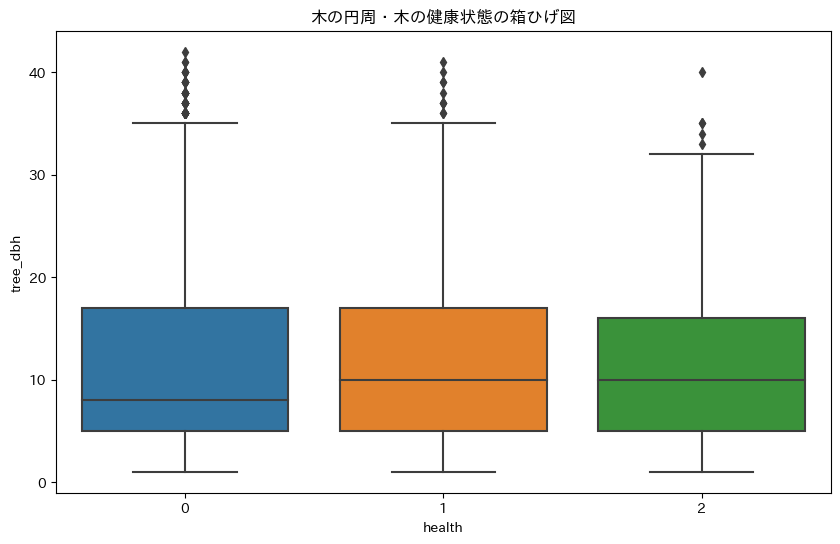

In [61]:
#„ÄÄÊú®„ÅÆÁõ¥ÂæÑ„Å®health„ÅÆÈñ¢‰øÇ
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

plt.figure(figsize=(10, 6))
sns.boxplot(x='health', y='tree_dbh', data=train)
plt.title('Êú®„ÅÆÂÜÜÂë®„ÉªÊú®„ÅÆÂÅ•Â∫∑Áä∂ÊÖã„ÅÆÁÆ±„Å≤„ÅíÂõ≥')
plt.show()

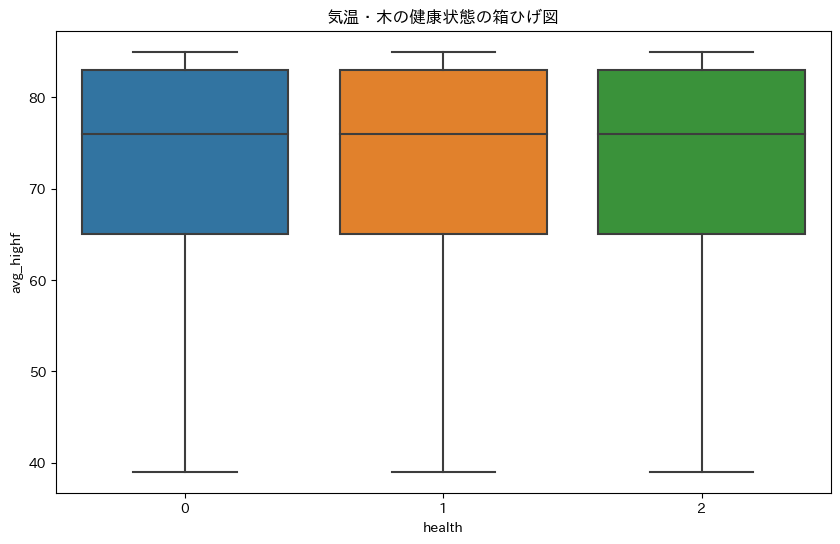

In [62]:
#„ÄÄÊú®„ÅÆÁõ¥ÂæÑ„Å®health„ÅÆÈñ¢‰øÇ
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

plt.figure(figsize=(10, 6))
sns.boxplot(x='health', y='avg_highf', data=train)
plt.title('Ê∞óÊ∏©„ÉªÊú®„ÅÆÂÅ•Â∫∑Áä∂ÊÖã„ÅÆÁÆ±„Å≤„ÅíÂõ≥')
plt.show()

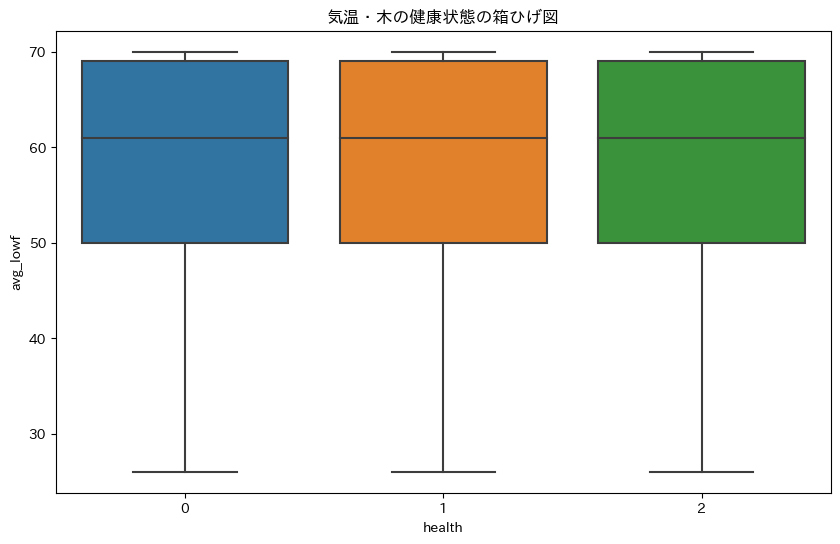

In [63]:
#„ÄÄÊú®„ÅÆÁõ¥ÂæÑ„Å®health„ÅÆÈñ¢‰øÇ
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

plt.figure(figsize=(10, 6))
sns.boxplot(x='health', y='avg_lowf', data=train)
plt.title('Ê∞óÊ∏©„ÉªÊú®„ÅÆÂÅ•Â∫∑Áä∂ÊÖã„ÅÆÁÆ±„Å≤„ÅíÂõ≥')
plt.show()

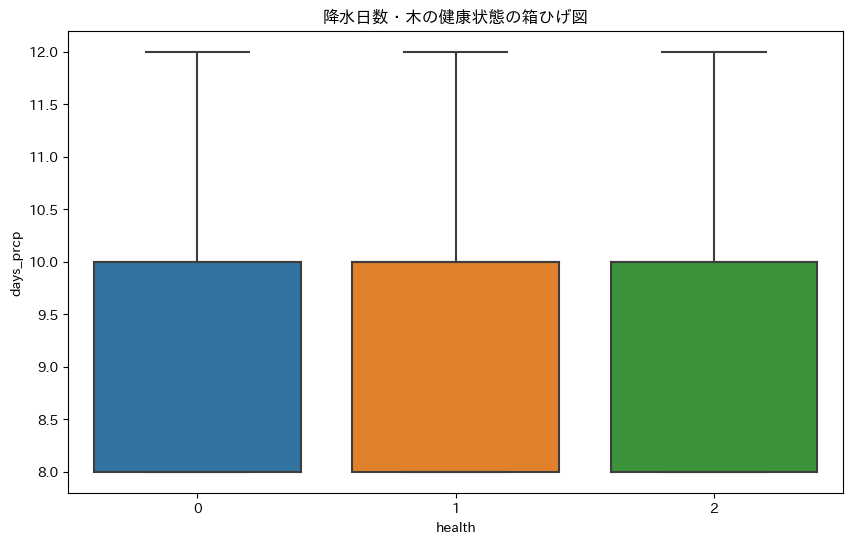

In [64]:
#„ÄÄÊú®„ÅÆÁõ¥ÂæÑ„Å®health„ÅÆÈñ¢‰øÇ
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

plt.figure(figsize=(10, 6))
sns.boxplot(x='health', y='days_prcp', data=train)
plt.title('ÈôçÊ∞¥Êó•Êï∞„ÉªÊú®„ÅÆÂÅ•Â∫∑Áä∂ÊÖã„ÅÆÁÆ±„Å≤„ÅíÂõ≥')
plt.show()

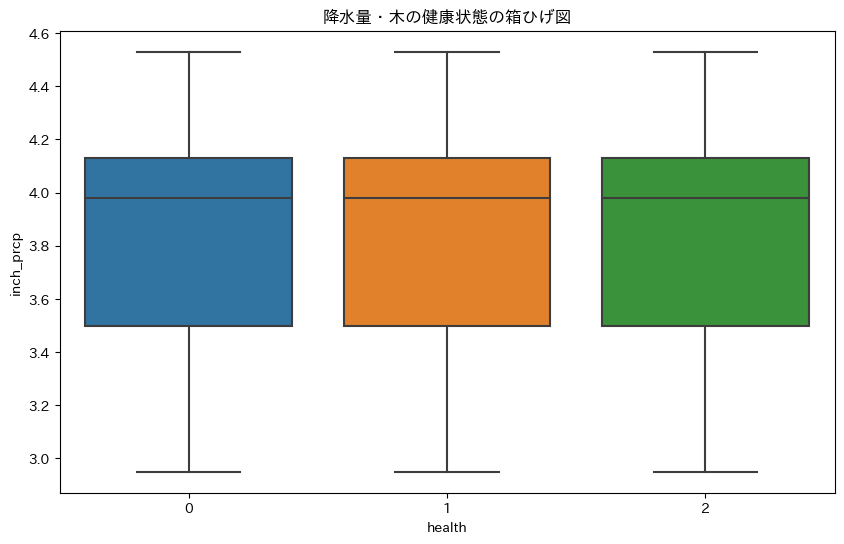

In [65]:
#„ÄÄÊú®„ÅÆÁõ¥ÂæÑ„Å®health„ÅÆÈñ¢‰øÇ
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

plt.figure(figsize=(10, 6))
sns.boxplot(x='health', y='inch_prcp', data=train)
plt.title('ÈôçÊ∞¥Èáè„ÉªÊú®„ÅÆÂÅ•Â∫∑Áä∂ÊÖã„ÅÆÁÆ±„Å≤„ÅíÂõ≥')
plt.show()

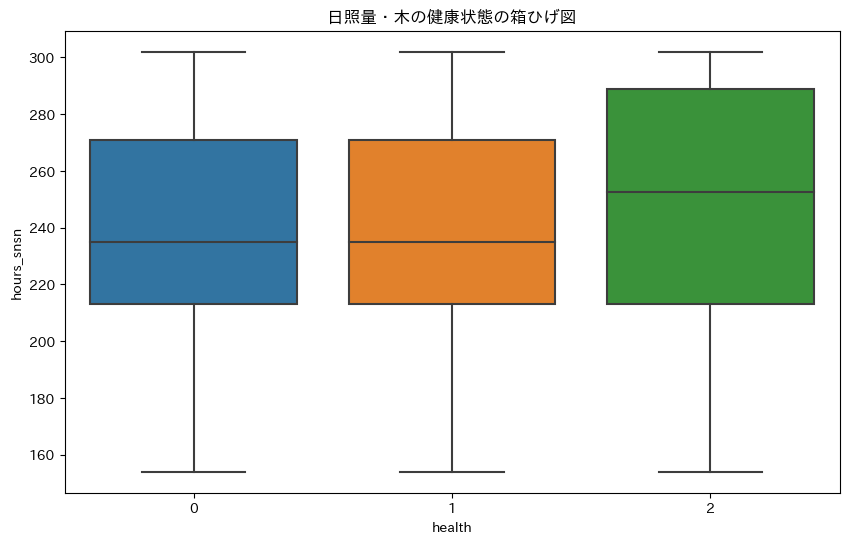

In [66]:
#„ÄÄÊú®„ÅÆÁõ¥ÂæÑ„Å®health„ÅÆÈñ¢‰øÇ
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

plt.figure(figsize=(10, 6))
sns.boxplot(x='health', y='hours_snsn', data=train)
plt.title('Êó•ÁÖßÈáè„ÉªÊú®„ÅÆÂÅ•Â∫∑Áä∂ÊÖã„ÅÆÁÆ±„Å≤„ÅíÂõ≥')
plt.show()

‚Üí bad„Å™Êú®„ÅØËã•Âπ≤ÂÜÜÂë®„ÅåÂ§ß„Åç„ÅÑ„ÄÇËÇ≤„Å°„Åô„ÅéÁ≠â„ÅÆÂéüÂõ†„Åå„ÅÇ„Çã„Åã„ÇÇ„Åó„Çå„Å™„ÅÑ

In [67]:
# ÂèØË¶ñÂåñ„É©„Ç§„Éñ„É©„É™
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

colormap = plt.cm.RdBu
corr = train.corr()

<Axes: >

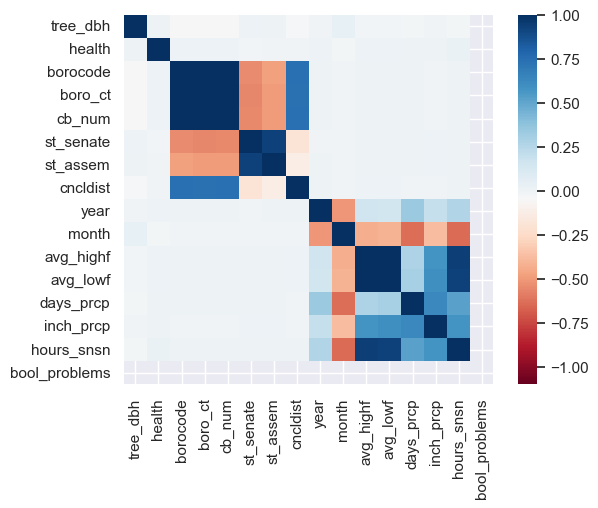

In [68]:
sns.heatmap(corr, square=True, 
            cmap=colormap, 
            linecolor='white', annot=False,
            vmin=1.0, vmax=-1.0)

# ÁâπÂæ¥Èáè„Ç®„É≥„Ç∏„Éã„Ç¢„É™„É≥„Ç∞

‰ªäÂõû„ÅÆÁâπÂæ¥Èáè„Ç®„É≥„Ç∏„Éã„Ç¢„É™„É≥„Ç∞

x_list = ["tree_dbh", "curb_loc","steward","guards","sidewalk","user_type"]
y_list = ["health"]
dummy_list = ["curb_loc","steward","guards","sidewalk","user_type"]

- ["curb_loc","steward","guards","sidewalk","user_type"]„Çí„ÉÄ„Éü„ÉºÂåñ„Åô„Çã
- "problems"„Çí„ÉÄ„Éü„ÉºÂåñ„Åô„Çã„ÄÇ„Åù„ÅÆÈöõÊúÄÂàù„ÅÆ10Ë°å„Å†„Åë„ÇíÊÆã„Åô


# Â∞ëÊï∞„ÅÆË≥™ÁöÑÂ§âÊï∞„Çí„ÉÄ„Éü„ÉºÂåñ
["curb_loc","steward","guards","sidewalk","user_type","borocode"]

In [69]:
dummy_list = ["curb_loc","steward","guards","sidewalk","user_type","borocode","season"]

X_train = pd.get_dummies(X_train, columns = dummy_list, drop_first=False)
X_train

tree_dbh            problems  bool_problems          spc_common   nta  \
0            14                NULL              1         English oak  QN45   
1             5                NULL              1  crimson king maple  BX05   
2            26  StonesBranchLights              1         English oak  SI01   
3            15                NULL              1         honeylocust  SI11   
4            23              Stones              1    London planetree  MN03   
...         ...                 ...            ...                 ...   ...   
19979        19                NULL              1         shingle oak  SI24   
19980         5                NULL              1             catalpa  SI32   
19981        21                NULL              1         English oak  SI48   
19982         4                NULL              1   littleleaf linden  MN25   
19983        31              Stones              1         honeylocust  BX59   

       boro_ct       zip_city  cb_num  st_senate  st_assem  ...  \
0      4152901    Little Neck     411         11        25  ...   
1      2039901          Bronx     207         33        78  ...   
2      5017011  Staten Island     503         24        62  ...   
3      5024401  Staten Island     503         24        62  ...   
4      1022102       New York     110         30        70  ...   
...        ...            ...     ...        ...       ...  ...   
19979  5018100  Staten Island     502         24        62  ...   
19980  5020804  Staten Island     503         24        62  ...   
19981  5017010  Staten Island     503         24        62  ...   
19982  1031704       New York     101         26        65  ...   
19983  2007800          Bronx     209         32        87  ...   

       user_type_Volunteer  borocode_1  borocode_2  borocode_3  borocode_4  \
0                        1           0           0           0           1   
1                        1           0           1           0           0   
2                        1           0           0           0           0   
3                        0           0           0           0           0   
4                        1           1           0           0           0   
...                    ...         ...         ...         ...         ...   
19979                    1           0           0           0           0   
19980                    0           0           0           0           0   
19981                    1           0           0           0           0   
19982                    0           1           0           0           0   
19983                    0           0           1           0           0   

       borocode_5  season_autumn  season_spring  season_summer  season_winter  
0               0              0              0              1              0  
1               0              1              0              0              0  
2               1              1              0              0              0  
3               1              0              1              0              0  
4               0              0              0              1              0  
...           ...            ...            ...            ...            ...  
19979           1              0              0              1              0  
19980           1              0              0              1              0  
19981           1              0              0              1              0  
19982           0              0              0              1              0  
19983           0              0              0              1              0  

[19984 rows x 38 columns]

# Ë≥™ÁöÑÂ§âÊï∞„Çí„Çø„Éº„Ç≤„ÉÉ„Éà„Ç®„É≥„Ç≥„Éº„Éá„Ç£„É≥„Ç∞
„Åæ„ÅöÂêÑ„Ç≥„É©„É†„ÅÆÂπ≥ÂùáÂÄ§„ÇíÊ±Ç„ÇÅ„Çã

In [70]:
column_means = train.groupby("curb_loc")["health"].mean("health")
column_means

curb_loc
OffsetFromCurb    0.276719
OnCurb            0.244821
Name: health, dtype: float64

In [71]:
# ‰∏ÄÊåô„Å´„Çø„Éº„Ç≤„ÉÉ„Éà„Ç®„É≥„Ç≥„Éº„Éá„Ç£„É≥„Ç∞
cols = ["curb_loc","steward","guards","sidewalk","user_type","problems","spc_common","nta","borocode","boro_ct", "zip_city", "cb_num", "st_senate", "st_assem", "cncldist","year","month"]
for col in cols:
    column_means = train.groupby(col)["health"].mean("health")
    column_means
    
    colname = col + "_tg_enc"
    
    X_train[colname] = train[col].map(column_means)

In [72]:
X_train.columns

Index(['tree_dbh', 'problems', 'bool_problems', 'spc_common', 'nta', 'boro_ct',
       'zip_city', 'cb_num', 'st_senate', 'st_assem', 'cncldist', 'year',
       'month', 'hours_snsn', 'curb_loc_OffsetFromCurb', 'curb_loc_OnCurb',
       'steward_1or2', 'steward_3or4', 'steward_4orMore', 'steward_NULL',
       'guards_Harmful', 'guards_Helpful', 'guards_NULL', 'guards_Unsure',
       'sidewalk_Damage', 'sidewalk_NoDamage', 'user_type_NYC Parks Staff',
       'user_type_TreesCount Staff', 'user_type_Volunteer', 'borocode_1',
       'borocode_2', 'borocode_3', 'borocode_4', 'borocode_5', 'season_autumn',
       'season_spring', 'season_summer', 'season_winter', 'curb_loc_tg_enc',
       'steward_tg_enc', 'guards_tg_enc', 'sidewalk_tg_enc',
       'user_type_tg_enc', 'problems_tg_enc', 'spc_common_tg_enc',
       'nta_tg_enc', 'borocode_tg_enc', 'boro_ct_tg_enc', 'zip_city_tg_enc',
       'cb_num_tg_enc', 'st_senate_tg_enc', 'st_assem_tg_enc',
       'cncldist_tg_enc', 'year_tg_enc', 'mont

In [73]:
# problems, spc_common„Çí„Éâ„É≠„ÉÉ„Éó„Ç¢„Ç¶„Éà
drop_col = ["problems","spc_common","nta","boro_ct", "zip_city", "cb_num", "st_senate", "st_assem", "cncldist","year","month"]

X_train = X_train.drop(drop_col , axis=1)
X_train

tree_dbh  bool_problems  hours_snsn  curb_loc_OffsetFromCurb  \
0            14              1         289                        0   
1             5              1         235                        0   
2            26              1         235                        0   
3            15              1         268                        0   
4            23              1         289                        0   
...         ...            ...         ...                      ...   
19979        19              1         302                        0   
19980         5              1         302                        0   
19981        21              1         271                        0   
19982         4              1         289                        0   
19983        31              1         271                        0   

       curb_loc_OnCurb  steward_1or2  steward_3or4  steward_4orMore  \
0                    1             0             0                0   
1                    1             0             1                0   
2                    1             0             0                0   
3                    1             0             0                0   
4                    1             0             0                0   
...                ...           ...           ...              ...   
19979                1             0             0                0   
19980                1             0             0                0   
19981                1             0             0                0   
19982                1             1             0                0   
19983                1             0             0                0   

       steward_NULL  guards_Harmful  ...  nta_tg_enc  borocode_tg_enc  \
0                 1               0  ...    0.297297         0.256391   
1                 0               0  ...    0.216216         0.247137   
2                 1               0  ...    0.273333         0.245783   
3                 1               0  ...    0.245125         0.245783   
4                 1               0  ...    0.291139         0.235140   
...             ...             ...  ...         ...              ...   
19979             1               0  ...    0.327586         0.245783   
19980             1               0  ...    0.235294         0.245783   
19981             1               0  ...    0.213270         0.245783   
19982             0               0  ...    0.185430         0.235140   
19983             1               0  ...    0.287129         0.247137   

       boro_ct_tg_enc  zip_city_tg_enc  cb_num_tg_enc  st_senate_tg_enc  \
0            0.428571         0.297297       0.276394          0.272149   
1            0.214286         0.247137       0.235955          0.275974   
2            0.333333         0.245783       0.243804          0.247160   
3            0.258065         0.245783       0.243804          0.247160   
4            0.291667         0.235112       0.241611          0.221757   
...               ...              ...            ...               ...   
19979        0.440000         0.245783       0.261628          0.247160   
19980        0.285714         0.245783       0.243804          0.247160   
19981        0.261538         0.245783       0.243804          0.247160   
19982        0.174497         0.235112       0.238095          0.213333   
19983        0.187500         0.247137       0.290503          0.231250   

       st_assem_tg_enc  cncldist_tg_enc  year_tg_enc  month_tg_enc  
0             0.268251         0.280330     0.242367      0.280201  
1             0.215909         0.294686     0.260906      0.260163  
2             0.250171         0.246259     0.242367      0.260163  
3             0.250171         0.246259     0.260906      0.296552  
4             0.214612         0.229630     0.260906      0.280201  
...                ...              ...          ...           ...  
19979         0.250171         0.258920 

In [74]:
# ÂèØË¶ñÂåñ„É©„Ç§„Éñ„É©„É™
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

colormap = plt.cm.RdBu
corr = X_train.corr()

<Axes: >

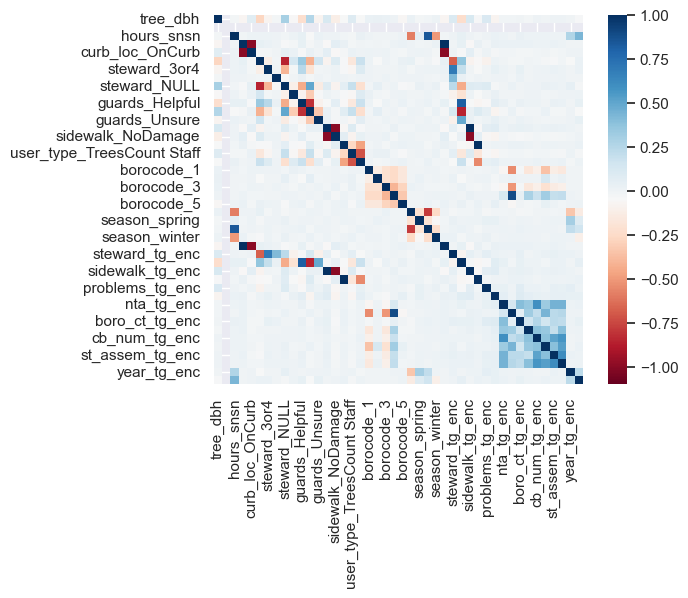

In [75]:
sns.heatmap(corr, square=True, 
            cmap=colormap, 
            linecolor='white', annot=False,
            vmin=1.0, vmax=-1.0)

# „Ç™„Éº„Éê„Éº„Çµ„É≥„Éó„É™„É≥„Ç∞
Á≠âÂÄç„Å´„Åô„Çã„Ç™„Éº„Éê„Éº„Çµ„É≥„Éó„É™„É≥„Ç∞„Åß„ÅØÈÄÜÂäπÊûú„ÄÇ
1, 2„ÅÆÊï∞„ÇíÂÄç„Å´„Åó„Å¶Á≤æÂ∫¶Âêë‰∏ä„Åô„Çã„Åã„ÇíÊ§úË®º„Åô„Çã

In [76]:
y_train.value_counts()

health
0         15751
1          3535
2           698
dtype: int64

In [77]:
"""
from imblearn.over_sampling import SMOTE

strategy = {0:15751, 1:3535*2, 2:698*2}
sm = SMOTE(sampling_strategy = strategy)

X_resampled, y_resampled = sm.fit_resample(X_train, y_train)
y_resampled.value_counts()

X_train, y_train = X_resampled, y_resampled
X_train.shape
"""

'\nfrom imblearn.over_sampling import SMOTE\n\nstrategy = {0:15751, 1:3535*2, 2:698*2}\nsm = SMOTE(sampling_strategy = strategy)\n\nX_resampled, y_resampled = sm.fit_resample(X_train, y_train)\ny_resampled.value_counts()\n\nX_train, y_train = X_resampled, y_resampled\nX_train.shape\n'

# Ê®ôÊ∫ñÂåñ

In [78]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = pd.DataFrame(std_scaler.transform(X_train), columns=X_train.columns)
X_train_std.describe()

tree_dbh  bool_problems    hours_snsn  curb_loc_OffsetFromCurb  \
count  1.998400e+04        19984.0  1.998400e+04             1.998400e+04   
mean  -8.604451e-17            0.0  1.584001e-16             2.275557e-17   
std    1.000025e+00            0.0  1.000025e+00             1.000025e+00   
min   -1.304584e+00            0.0 -1.858058e+00            -2.535365e-01   
25%   -8.166566e-01            0.0 -5.896872e-01            -2.535365e-01   
50%   -3.287294e-01            0.0 -1.167352e-01            -2.535365e-01   
75%    6.471248e-01            0.0  6.571863e-01            -2.535365e-01   
max    3.696669e+00            0.0  1.323619e+00             3.944205e+00   

       curb_loc_OnCurb  steward_1or2  steward_3or4  steward_4orMore  \
count     1.998400e+04  1.998400e+04  1.998400e+04     1.998400e+04   
mean     -5.688893e-18  4.533337e-17 -6.328893e-17    -1.848890e-17   
std       1.000025e+00  1.000025e+00  1.000025e+00     1.000025e+00   
min      -3.944205e+00 -5.001720e-01 -2.389034e-01    -3.394476e-02   
25%       2.535365e-01 -5.001720e-01 -2.389034e-01    -3.394476e-02   
50%       2.535365e-01 -5.001720e-01 -2.389034e-01    -3.394476e-02   
75%       2.535365e-01 -5.001720e-01 -2.389034e-01    -3.394476e-02   
max       2.535365e-01  1.999312e+00  4.185792e+00     2.945963e+01   

       steward_NULL  guards_Harmful  ...    nta_tg_enc  borocode_tg_enc  \
count  1.998400e+04    1.998400e+04  ...  1.998400e+04     1.998400e+04   
mean  -1.015112e-16    7.875561e-17  ...  2.062224e-17     8.259562e-16   
std    1.000025e+00    1.000025e+00  ...  1.000025e+00     1.000025e+00   
min   -1.708117e+00   -1.839386e-01  ... -4.398037e+00    -1.529876e+00   
25%   -1.708117e+00   -1.839386e-01  ... -5.909592e-01    -8.779799e-01   
50%    5.854400e-01   -1.839386e-01  ... -2.891149e-02    -1.270904e-01   
75%    5.854400e-01   -1.839386e-01  ...  6.521094e-01     1.270996e+00   
max    5.854400e-01    5.436596e+00  ...  3.125005e+01     1.270996e+00   

       boro_ct_tg_enc  zip_city_tg_enc  cb_num_tg_enc  st_senate_tg_enc  \
count    1.998400e+04     1.998400e+04   1.998400e+04      1.998400e+04   
mean     2.133335e-18    -3.591114e-17   2.008890e-17     -9.102229e-17   
std      1.000025e+00     1.000025e+00   1.000025e+00      1.000025e+00   
min     -1.760411e+00    -4.457815e+00  -2.923448e+00     -2.728807e+00   
25%     -5.713332e-01    -2.858351e-01  -5.453667e-01     -5.617564e-01   
50%     -3.829844e-02    -1.204883e-01  -8.108344e-02      1.921571e-02   
75%      4.348094e-01     1.669868e-02   8.166966e-01      6.239131e-01   
max      1.250852e+01     3.715306e+00   2.468593e+01      3.505659e+00   

       st_assem_tg_enc  cncldist_tg_enc   year_tg_enc  month_tg_enc  
count     1.998400e+04     1.998400e+04  1.998400e+04  1.998400e+04  
mean     -2.444446e-17     8.035561e-17 -3.342225e-16  2.647113e-16  
std       1.000025e+00     1.000025e+00  1.000025e+00  1.000025e+00  
min      -4.327745e+00    -3.144033e+00 -5.562337e-01 -3.275744e+00  
25%      -5.967726e-01    -5.047983e-01 -5.562337e-01 -4.828016e-01  
50%      -4.566778e-02    -7.134271e-02 -5.562337e-01 -2.378356e-01  
75%       6.755981e-01     8.288093e-01 -5.562337e-01  6.810486e-01  
max       3.068530e+00     2.370850e+00  1.797806e+00  2.528412e+00  

[8 rows x 44 columns]

In [79]:
X_train_std.head(5)

tree_dbh  bool_problems  hours_snsn  curb_loc_OffsetFromCurb  \
0  0.281179            0.0    1.044147                -0.253537   
1 -0.816657            0.0   -0.116735                -0.253537   
2  1.744961            0.0   -0.116735                -0.253537   
3  0.403161            0.0    0.592693                -0.253537   
4  1.379016            0.0    1.044147                -0.253537   

   curb_loc_OnCurb  steward_1or2  steward_3or4  steward_4orMore  steward_NULL  \
0         0.253537     -0.500172     -0.238903        -0.033945      0.585440   
1         0.253537     -0.500172      4.185792        -0.033945     -1.708117   
2         0.253537     -0.500172     -0.238903        -0.033945      0.585440   
3         0.253537     -0.500172     -0.238903        -0.033945      0.585440   
4         0.253537     -0.500172     -0.238903        -0.033945      0.585440   

   guards_Harmful  ...  nta_tg_enc  borocode_tg_enc  boro_ct_tg_enc  \
0       -0.183939  ...    0.901004         1.270996        1.297217   
1       -0.183939  ...   -0.544189         0.051292       -0.231597   
2       -0.183939  ...    0.473869        -0.127090        0.617744   
3       -0.183939  ...   -0.028911        -0.127090        0.080742   
4       -0.183939  ...    0.791242        -1.529876        0.320475   

   zip_city_tg_enc  cb_num_tg_enc  st_senate_tg_enc  st_assem_tg_enc  \
0         2.169040       0.816697          1.182785         0.639067   
1         0.016699      -0.297306          1.360916        -0.916473   
2        -0.041376      -0.081083          0.019216         0.101755   
3        -0.041376      -0.081083          0.019216         0.101755   
4        -0.499241      -0.141504         -1.163644        -0.955025   

   cncldist_tg_enc  year_tg_enc  month_tg_enc  
0         1.091339    -0.556234      1.698311  
1         1.557877     1.797806      0.681049  
2        -0.015860    -0.556234      0.681049  
3        -0.015860     1.797806      2.528412  
4        -0.556282     1.797806      1.698311  

[5 rows x 44 columns]

# ÁâπÂæ¥ÈáèÈÅ∏Êäû
Â≠¶Áøí„Å´‰Ωø„ÅÜÁâπÂæ¥Èáè„ÇíÁµû„Çã


In [80]:

from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

# estimator„Å®„Åó„Å¶GBDT„Çí‰ΩøÁî®„ÄÇÁâπÂæ¥Èáè„Çí20ÂÄãÈÅ∏Êäû
selector = RFE(GradientBoostingRegressor(n_estimators=100, random_state=10), n_features_to_select=35)
selector.fit(X_train_std, y_train)
mask = selector.get_support()
#print(X.feature_names)
print(mask)

# ÈÅ∏Êäû„Åó„ÅüÁâπÂæ¥Èáè„ÅÆÂàó„ÅÆ„ÅøÂèñÂæó
X_selected = selector.transform(X_train_std)
print("X.shape={}, X_selected.shape={}".format(X_train_std.shape, X_selected.shape))

list = []
not_selected = []
columns = X_train_std.columns

for i in range(0, len(mask)):
    
    value = mask[i]
    
    if (value == True):
        list.append(columns[i])
    else:
        not_selected.append(columns[i])

print("ÈÅ∏Êäû„Åï„Çå„Åü25„ÅÆÁâπÂæ¥ÈáèÔºö")
print(list)

print("ÈÅ∏Êäû„Åï„Çå„Å™„Åã„Å£„ÅüÁâπÂæ¥ÈáèÔºö")
print(not_selected)

[ True False  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True False False  True False False False
  True False  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True]
X.shape=(19984, 44), X_selected.shape=(19984, 35)
ÈÅ∏Êäû„Åï„Çå„Åü25„ÅÆÁâπÂæ¥ÈáèÔºö
['tree_dbh', 'hours_snsn', 'curb_loc_OffsetFromCurb', 'curb_loc_OnCurb', 'steward_1or2', 'steward_3or4', 'steward_4orMore', 'steward_NULL', 'guards_Harmful', 'guards_Helpful', 'guards_NULL', 'sidewalk_Damage', 'sidewalk_NoDamage', 'user_type_NYC Parks Staff', 'user_type_TreesCount Staff', 'user_type_Volunteer', 'borocode_3', 'season_spring', 'season_winter', 'curb_loc_tg_enc', 'steward_tg_enc', 'guards_tg_enc', 'sidewalk_tg_enc', 'user_type_tg_enc', 'problems_tg_enc', 'spc_common_tg_enc', 'nta_tg_enc', 'boro_ct_tg_enc', 'zip_city_tg_enc', 'cb_num_tg_enc', 'st_senate_tg_enc', 'st_assem_tg_enc', 'cncldist_tg_enc', 'year_tg_enc', 'month_tg_enc

'boro_ct_tg_enc'„Çí„É™„Çπ„Éà„Åã„ÇâÁúÅ„Åè

# 25„Å´Áµû„Å£„ÅüX_train_std„ÅÆÂ§âÊï∞„ÇíÊ¨°ÂÖÉÂúßÁ∏Æ

In [81]:
"""
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.manifold import TSNE

pca = decomposition.PCA()
X_pca = pca.fit_transform(X_train_std)
X_pca.shape

X_tsne_nc = TSNE(learning_rate = 100).fit_transform(X_train_std)
print(X_tsne_nc[:5, :5])
print("--- X_tsne_nopca ---")

X_tsne = TSNE(learning_rate = 100).fit_transform(X_pca)
print(X_tsne[:5, :5])
print("--- X_tsne ---")

plt.figure(figsize = (12, 12))

plt.subplot(221)
plt.scatter(X_train_std["tree_dbh"], X_train_std["problems_tg_enc"],color = "blue", alpha = 0.25)

plt.subplot(222)
plt.scatter(X_tsne_nc[:,0], X_tsne_nc[:,1],color = "blue", alpha = 0.25)

plt.subplot(223)
plt.scatter(X_pca[:,0], X_pca[:,1],color = "blue", alpha = 0.25)

plt.subplot(224)
plt.scatter(X_tsne[:,0], X_tsne[:,1],color = "blue", alpha = 0.25)

plt.show()
"""

'\nfrom sklearn import preprocessing\nfrom sklearn import decomposition\nfrom sklearn.manifold import TSNE\n\npca = decomposition.PCA()\nX_pca = pca.fit_transform(X_train_std)\nX_pca.shape\n\nX_tsne_nc = TSNE(learning_rate = 100).fit_transform(X_train_std)\nprint(X_tsne_nc[:5, :5])\nprint("--- X_tsne_nopca ---")\n\nX_tsne = TSNE(learning_rate = 100).fit_transform(X_pca)\nprint(X_tsne[:5, :5])\nprint("--- X_tsne ---")\n\nplt.figure(figsize = (12, 12))\n\nplt.subplot(221)\nplt.scatter(X_train_std["tree_dbh"], X_train_std["problems_tg_enc"],color = "blue", alpha = 0.25)\n\nplt.subplot(222)\nplt.scatter(X_tsne_nc[:,0], X_tsne_nc[:,1],color = "blue", alpha = 0.25)\n\nplt.subplot(223)\nplt.scatter(X_pca[:,0], X_pca[:,1],color = "blue", alpha = 0.25)\n\nplt.subplot(224)\nplt.scatter(X_tsne[:,0], X_tsne[:,1],color = "blue", alpha = 0.25)\n\nplt.show()\n'

In [82]:
"""
plt.figure(figsize = (12, 12))

plt.subplot(221)
plt.scatter(X_train_std["tree_dbh"], X_train_std["problems_tg_enc"],color = "blue", alpha = 0.25)

plt.subplot(222)
plt.scatter(X_tsne_nc[:,0], X_tsne_nc[:,1],color = "blue", alpha = 0.25)

plt.subplot(223)
plt.scatter(X_pca[:,0], X_pca[:,1],c = y_train["health"], alpha = 0.25,cmap='plasma')

plt.subplot(224)
plt.scatter(X_tsne[:,0], X_tsne[:,1],c = y_train["health"], alpha = 0.25,cmap='plasma')
"""

'\nplt.figure(figsize = (12, 12))\n\nplt.subplot(221)\nplt.scatter(X_train_std["tree_dbh"], X_train_std["problems_tg_enc"],color = "blue", alpha = 0.25)\n\nplt.subplot(222)\nplt.scatter(X_tsne_nc[:,0], X_tsne_nc[:,1],color = "blue", alpha = 0.25)\n\nplt.subplot(223)\nplt.scatter(X_pca[:,0], X_pca[:,1],c = y_train["health"], alpha = 0.25,cmap=\'plasma\')\n\nplt.subplot(224)\nplt.scatter(X_tsne[:,0], X_tsne[:,1],c = y_train["health"], alpha = 0.25,cmap=\'plasma\')\n'

In [ ]:
# „Éõ„Éº„É´„Éâ„Ç¢„Ç¶„ÉàÊ§úË®º - Â≠¶ÁøíÁî®„Éª„ÉÜ„Çπ„ÉàÁî®„ÅÆÂàÜÂâ≤„Çí1ÈÄö„ÇäÊ±∫„ÇÅ„Çã
X_tr, X_va, y_tr, y_va = train_test_split(X_train_std[list], y_train, test_size=0.2, shuffle=True, stratify=y_train, random_state=123)

print("Â≠¶ÁøíÁî®„ÉªË®ìÁ∑¥Áî®„Éá„Éº„Çø„ÅÆÂΩ¢Áä∂Ôºö")
print(X_tr.shape)
print(y_tr.shape)
print(X_va.shape)
print(y_va.shape)

Â≠¶ÁøíÁî®„ÉªË®ìÁ∑¥Áî®„Éá„Éº„Çø„ÅÆÂΩ¢Áä∂Ôºö
(15987, 35)
(15987, 1)
(3997, 35)
(3997, 1)


In [84]:
"""
# „Éõ„Éº„É´„Éâ„Ç¢„Ç¶„ÉàÊ§úË®º(Ê¨°ÂÖÉÂúßÁ∏Æ„Åó„ÅüüÖÇ„Éá„Éº„Çø)
X_tr_dr, X_va_dr, y_tr_dr, y_va_dr = train_test_split(X_tsne, y_train, test_size=0.2, shuffle=True, stratify=y_train, random_state=123)

print("Â≠¶ÁøíÁî®„ÉªË®ìÁ∑¥Áî®„Éá„Éº„Çø„ÅÆÂΩ¢Áä∂Ôºö")
print(X_tr.shape)
print(y_tr.shape)
print(X_va.shape)
print(y_va.shape)
"""

'\n# „Éõ„Éº„É´„Éâ„Ç¢„Ç¶„ÉàÊ§úË®º(Ê¨°ÂÖÉÂúßÁ∏Æ„Åó„ÅüüÖÇ„Éá„Éº„Çø)\nX_tr_dr, X_va_dr, y_tr_dr, y_va_dr = train_test_split(X_tsne, y_train, test_size=0.2, shuffle=True, stratify=y_train, random_state=123)\n\nprint("Â≠¶ÁøíÁî®„ÉªË®ìÁ∑¥Áî®„Éá„Éº„Çø„ÅÆÂΩ¢Áä∂Ôºö")\nprint(X_tr.shape)\nprint(y_tr.shape)\nprint(X_va.shape)\nprint(y_va.shape)\n'

In [85]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Embedding, Flatten, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.optimizers import Adam, SGD


In [86]:
# „Éã„É•„Éº„É©„É´„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„Å´„Çà„ÇãÂ≠¶Áøí + „É¢„Éá„É´ÊúÄÈÅ©Âåñ
def model_neuralnet(INPUT_SHAPE = X_tr.shape[1]):
    
    # „Éë„É©„É°„Éº„Çø
    DU_01 = 50
    DO_01 = 0.3
    DU_02 = 50
    DO_02 = 0.2
    DU_03 = 10
    DO_03 = 0.1
    
    input_num = Input(shape = (INPUT_SHAPE, ))
    
    x_num = Dense(DU_01, activation = "relu")(input_num)
    x_num = BatchNormalization()(x_num)
    X_num = Dropout(DO_01)(x_num)
    
    x_num = Dense(DU_02, activation = "relu")(x_num)
    x_num = BatchNormalization()(x_num)
    X_num = Dropout(DO_02)(x_num)
    
    x_num = Dense(DU_03, activation = "relu")(x_num)
    x_num = BatchNormalization()(x_num)
    X_num = Dropout(DO_03)(x_num)
    
    out = Dense(3, activation = "softmax")(x_num)
    model = Model(inputs = input_num, outputs = out, )
    model.compile(optimizer = "Adam", loss = "sparse_categorical_crossentropy", metrics=['accuracy'])
    
    return model

In [87]:
# „É¢„Éá„É´„ÅÆÂ≠¶Áøí
model_nn = model_neuralnet()
model_nn.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 35)]              0         
                                                                 
 dense (Dense)               (None, 50)                1800      
                                                                 
 batch_normalization (Batch  (None, 50)                200       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 batch_normalization_1 (Bat  (None, 50)                200       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 10)                510 

In [88]:
result = model_nn.fit(X_tr, y_tr, batch_size=200, epochs=20, validation_data=(X_va, y_va), verbose=1)

Epoch 1/20


80/80 [==============================] - 3s 8ms/step - loss: 1.1069 - accuracy: 0.4830 - val_loss: 0.8983 - val_accuracy: 0.6943
Epoch 2/20
80/80 [==============================] - 0s 3ms/step - loss: 0.8416 - accuracy: 0.7000 - val_loss: 0.7607 - val_accuracy: 0.7746
Epoch 3/20
80/80 [==============================] - 0s 4ms/step - loss: 0.7034 - accuracy: 0.7759 - val_loss: 0.6768 - val_accuracy: 0.7833
Epoch 4/20
80/80 [==============================] - 0s 4ms/step - loss: 0.6330 - accuracy: 0.7869 - val_loss: 0.6328 - val_accuracy: 0.7853
Epoch 5/20
80/80 [==============================] - 0s 4ms/step - loss: 0.6000 - accuracy: 0.7910 - val_loss: 0.6124 - val_accuracy: 0.7861
Epoch 6/20
80/80 [==============================] - 0s 4ms/step - loss: 0.5828 - accuracy: 0.7917 - val_loss: 0.6036 - val_accuracy: 0.7848
Epoch 7/20
80/80 [==============================] - 0s 4ms/step - loss: 0.5703 - accuracy: 0.7920 - val_loss: 0.5983 - val_accuracy: 0.7861
Epoch 8/20
80/80 [

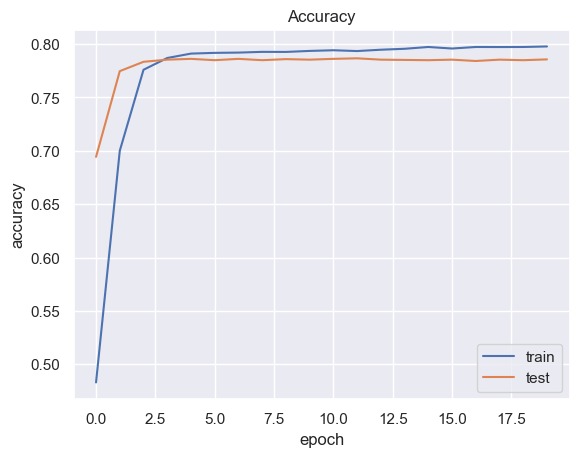

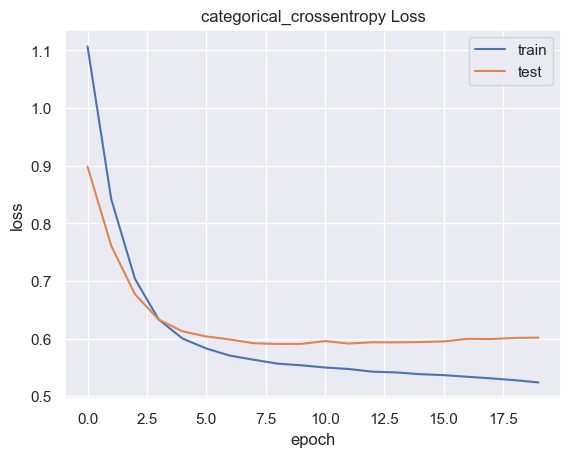

In [89]:
# Accuracy„ÅÆ„Éó„É≠„ÉÉ„Éà
plt.figure()
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(result.history['accuracy'], label='train')
plt.plot(result.history['val_accuracy'], label='test')
plt.legend()

# Loss„ÅÆ„Éó„É≠„ÉÉ„Éà
plt.figure()
plt.title('categorical_crossentropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(result.history['loss'], label='train')
plt.plot(result.history['val_loss'], label='test')
plt.legend()
plt.show()


In [90]:
y_tr_pred = model_nn.predict(X_tr)
y_va_pred = model_nn.predict(X_va)

#‰∫àÊ∏¨Á¢∫Áéá„ÇíÊúÄ„ÇÇÂèØËÉΩÊÄß„ÅÆÈ´ò„ÅÑ„ÇØ„É©„Çπ„Å´Â§âÊèõ
y_tr_pred = np.argmax(y_tr_pred, axis=1)
y_va_pred = np.argmax(y_va_pred, axis=1)

125/125 [==============================] - 0s 2ms/step


In [91]:
metric_tr = accuracy_score(y_tr, y_tr_pred)
metric_va = accuracy_score(y_va, y_va_pred)
print("„É¢„Éá„É´Á≤æÂ∫¶:")
print("Â≠¶ÁøíÁ≤æÂ∫¶")
print(metric_tr)
print("Ê§úË®ºÁ≤æÂ∫¶")

print(metric_va)

„É¢„Éá„É´Á≤æÂ∫¶:
Â≠¶ÁøíÁ≤æÂ∫¶
0.8011509351347971
Ê§úË®ºÁ≤æÂ∫¶
0.7855891918939204


ÊØîÈáç‰ªò„ÅçÁ≤æÂ∫¶Ôºö
0.3561642830949762
„Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö
0.34270990880394137
Ê∑∑ÂêàË°åÂàóÔºö
[[3106  678  122]
 [  33   28   12]
 [  11    1    6]]


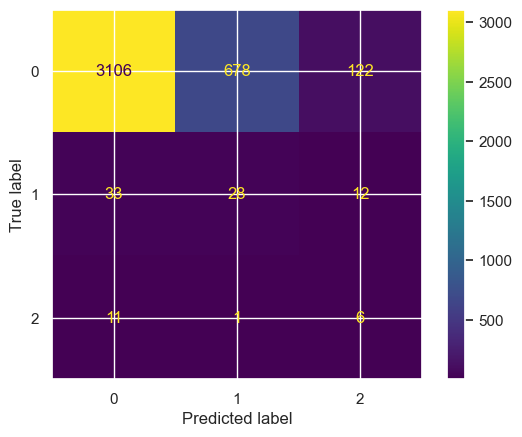

In [92]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
bas_score = balanced_accuracy_score(y_va, y_va_pred)

print("ÊØîÈáç‰ªò„ÅçÁ≤æÂ∫¶Ôºö")
print(bas_score)

valid_f1 = f1_score(y_va, y_va_pred, average='macro')

print("„Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö")
print(valid_f1)

# Ê∑∑ÂêàË°åÂàó - „É©„Éô„É´„ÅÆÊ≠£Ë™§„ÅÆÂàÜÈ°ûÊï∞„Çí„Åæ„Å®„ÇÅ„Çã
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_va_pred, y_va)
print("Ê∑∑ÂêàË°åÂàóÔºö")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0","1","2"])
disp.plot()
plt.show()

In [93]:
# „Éã„É•„Éº„É©„É´„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„Å´„Çà„ÇãÂ≠¶Áøí + „É¢„Éá„É´ÊúÄÈÅ©Âåñ
def model_neuralnet_optimized(INPUT_SHAPE = X_tr.shape[1], DU_01=50, DO_01=0.3, DU_02=50, DO_02=0.2, DU_03=10, DO_03=0.1,BATCH=32):
    
    # „Éë„É©„É°„Éº„Çø
    """
    DU_01 = 50
    DO_01 = 0.3
    DU_02 = 50
    DO_02 = 0.2
    DU_03 = 10
    DO_03 = 0.1
    """
    
    input_num = Input(shape = (INPUT_SHAPE, ))
    
    x_num = Dense(DU_01, activation = "relu")(input_num)
    x_num = BatchNormalization()(x_num)
    X_num = Dropout(DO_01)(x_num)
    
    x_num = Dense(DU_02, activation = "relu")(x_num)
    x_num = BatchNormalization()(x_num)
    X_num = Dropout(DO_02)(x_num)
    
    x_num = Dense(DU_03, activation = "relu")(x_num)
    x_num = BatchNormalization()(x_num)
    X_num = Dropout(DO_03)(x_num)
    
    out = Dense(3, activation = "softmax")(x_num)
    model = Model(inputs = input_num, outputs = out, )
    model.compile(optimizer = "Adam", loss = "sparse_categorical_crossentropy", metrics=['accuracy'])
    
    return model

In [94]:
import optuna
def objective(trial):
    
# „Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢„ÇíÊúÄÂ§ßÂåñ„Åï„Åõ„Çã
    from sklearn.metrics import f1_score
    from sklearn.metrics import balanced_accuracy_score

# „ÉÅ„É•„Éº„Éã„É≥„Ç∞„ÅßÊé¢Á¥¢„Åô„ÇãÊúÄÈÅ©„Éë„É©„É°„Éº„Çø
    params_tuning = {
        "DU_01": trial.suggest_int("DU_01", 10, 100),
        "DO_01":trial.suggest_float("DO_01", 0.1, 0.3),
        "DU_02": trial.suggest_int("DU_02", 10, 100),
        "DO_02":trial.suggest_float("DO_02", 0.1, 0.3),
        "DU_03": trial.suggest_int("DU_03", 3, 30),
        "DO_03":trial.suggest_float("DO_03", 0.1, 0.3),
        
        "BATCH": trial.suggest_int("batch", 64, 128),
        # "optimizer":trial.suggest_categorical("optimizer",["Adam","SGD"])
    }

    # „Éõ„Éº„É´„Éâ„Ç¢„Ç¶„ÉàÊ§úË®º - Â≠¶ÁøíÁî®„Éª„ÉÜ„Çπ„ÉàÁî®„ÅÆÂàÜÂâ≤„Çí1ÈÄö„ÇäÊ±∫„ÇÅ„Çã
    X_tr, X_va, y_tr, y_va = train_test_split(X_train[list], y_train, test_size=0.2, shuffle=True, stratify=y_train, random_state=123)

        
    # „É¢„Éá„É´„ÅÆÂ≠¶Áøí
    model_nn = model_neuralnet_optimized(INPUT_SHAPE = X_tr.shape[1], **params_tuning)
    #model_nn.summary()
        
    model_nn.fit(X_tr, y_tr, batch_size=params_tuning["BATCH"], epochs=20, validation_data=(X_va, y_va), verbose=1
                    #early_stopping_rounds=100, 
                    #verbose=0
                    )
    y_va_pred = model_nn.predict(X_va)
    y_va_pred = np.argmax(y_va_pred, axis=1)
    
    #Ê§úË®ºÁ≤æÂ∫¶„ÇíÊ±Ç„ÇÅ„Çã
    metric_va = f1_score(y_va, y_va_pred, average="macro")
    #metric_va = accuracy_score(y_va, y_va_pred)
    return metric_va

# Êé¢Á¥¢„ÇíÂÆüË°å
sampler = optuna.samplers.TPESampler(seed=123)
study = optuna.create_study(sampler=sampler, direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-12-19 15:15:01,102] A new study created in memory with name: no-name-4f662bb7-a02f-412f-851d-82ab9d84fab8


Epoch 1/20
126/126 [==============================] - 3s 7ms/step - loss: 0.9391 - accuracy: 0.6328 - val_loss: 0.8654 - val_accuracy: 0.7643
Epoch 2/20
126/126 [==============================] - 1s 4ms/step - loss: 0.6599 - accuracy: 0.7879 - val_loss: 0.7912 - val_accuracy: 0.7853
Epoch 3/20
126/126 [==============================] - 1s 5ms/step - loss: 0.6052 - accuracy: 0.7890 - val_loss: 0.6908 - val_accuracy: 0.7426
Epoch 4/20
126/126 [==============================] - 1s 5ms/step - loss: 0.5867 - accuracy: 0.7901 - val_loss: 0.6451 - val_accuracy: 0.7503
Epoch 5/20
126/126 [==============================] - 1s 5ms/step - loss: 0.5800 - accuracy: 0.7898 - val_loss: 0.8118 - val_accuracy: 0.7886
Epoch 6/20
126/126 [==============================] - 0s 3ms/step - loss: 0.5761 - accuracy: 0.7911 - val_loss: 0.7223 - val_accuracy: 0.7896
Epoch 7/20
126/126 [==============================] - 0s 4ms/step - loss: 0.5742 - accuracy: 0.7913 - val_loss: 0.9244 - val_accuracy: 0.5266
Epoch 

[I 2023-12-19 15:15:16,017] Trial 0 finished with value: 0.3251438449183652 and parameters: {'DU_01': 73, 'DO_01': 0.1572278669900759, 'DU_02': 30, 'DO_02': 0.21026295381657822, 'DU_03': 23, 'DO_03': 0.1846212920248922, 'batch': 127}. Best is trial 0 with value: 0.3251438449183652.


Epoch 1/20
239/239 [==============================] - 4s 7ms/step - loss: 0.8361 - accuracy: 0.6941 - val_loss: 0.9250 - val_accuracy: 0.5767
Epoch 2/20
239/239 [==============================] - 1s 5ms/step - loss: 0.6130 - accuracy: 0.7887 - val_loss: 1.8202 - val_accuracy: 0.3100
Epoch 3/20
239/239 [==============================] - 2s 7ms/step - loss: 0.5908 - accuracy: 0.7883 - val_loss: 1.6555 - val_accuracy: 0.3928
Epoch 4/20
239/239 [==============================] - 1s 6ms/step - loss: 0.5813 - accuracy: 0.7899 - val_loss: 0.6026 - val_accuracy: 0.7893
Epoch 5/20
239/239 [==============================] - 2s 6ms/step - loss: 0.5800 - accuracy: 0.7892 - val_loss: 0.5888 - val_accuracy: 0.7883
Epoch 6/20
239/239 [==============================] - 1s 5ms/step - loss: 0.5753 - accuracy: 0.7904 - val_loss: 0.6000 - val_accuracy: 0.7891
Epoch 7/20
239/239 [==============================] - 2s 7ms/step - loss: 0.5757 - accuracy: 0.7898 - val_loss: 0.6006 - val_accuracy: 0.7873
Epoch 

[I 2023-12-19 15:15:41,456] Trial 1 finished with value: 0.3163345554282235 and parameters: {'DU_01': 72, 'DO_01': 0.1961863802968722, 'DU_02': 45, 'DO_02': 0.16863560323017387, 'DU_03': 23, 'DO_03': 0.18771444893592487, 'batch': 67}. Best is trial 0 with value: 0.3251438449183652.


Epoch 1/20
153/153 [==============================] - 4s 8ms/step - loss: 0.9318 - accuracy: 0.6546 - val_loss: 1.0632 - val_accuracy: 0.4831
Epoch 2/20
153/153 [==============================] - 1s 7ms/step - loss: 0.6594 - accuracy: 0.7881 - val_loss: 0.7987 - val_accuracy: 0.7215
Epoch 3/20
 85/153 [===============>..............] - ETA: 0s - loss: 0.6125 - accuracy: 0.7872

[W 2023-12-19 15:15:47,866] Trial 2 failed with parameters: {'DU_01': 46, 'DO_01': 0.24759908114640714, 'DU_02': 26, 'DO_02': 0.1350903512294985, 'DU_03': 17, 'DO_03': 0.2063655174193732, 'batch': 105} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\user\anaconda3\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\user\AppData\Local\Temp\ipykernel_19972\3037666645.py", line 29, in objective
    model_nn.fit(X_tr, y_tr, batch_size=params_tuning["BATCH"], epochs=20, validation_data=(X_va, y_va), verbose=1
  File "c:\Users\user\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "c:\Users\user\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1798, in fit
    for step in data_handler.steps():
  File "c:\Users\user\anaconda3\lib\site-packages\keras\src\engine\data_adapter.py"

KeyboardInterrupt: 

In [ ]:
trial = study.best_trial
print("ÊúÄ„ÇÇÈ´ò„ÅÑF1„Çπ„Ç≥„Ç¢")
print(trial.value)

print("ÊúÄ„ÇÇÈ´ò„ÅÑÁ≤æÂ∫¶„Å®„Å™„Çã„Éë„É©„É°„Éº„ÇøÔºö")
print(trial.params)

ÊúÄ„ÇÇÈ´ò„ÅÑF1„Çπ„Ç≥„Ç¢
0.36939651107967936
ÊúÄ„ÇÇÈ´ò„ÅÑÁ≤æÂ∫¶„Å®„Å™„Çã„Éë„É©„É°„Éº„ÇøÔºö
{'du_01': 54, 'do_01': 0.2242068153855472, 'du_02': 75, 'do_02': 0.1846854267310607, 'du_03': 14, 'do_03': 0.1363224268344519, 'batch': 100}

In [ ]:
params_best = trial.params
#params_best.update(params_base)
display(params_best)

In [ ]:
„Åì„Åì„Åæ„ÅßÂÆüË°å

In [ ]:
"""
params_best = { 'DU_01': 54,
                'DO_01': 0.224,
                'DU_02': 75,
                'DO_02': 0.18,
                'DU_03': 14,
                'DO_03': 0.13,
                'BATCH': 100}
"""

In [ ]:
params_best = { 'DU_01': 37,
                'DO_01': 0.21901246292653168,
                'DU_02': 56,
                'DO_02': 0.18512176420345966,
                'DU_03': 8,
                'DO_03': 0.2931650271930273,
                'BATCH': 92}

In [ ]:
model_nn = model_neuralnet_optimized(INPUT_SHAPE = X_tr.shape[1],**params_best)
model_nn.summary()
result = model_nn.fit(X_tr, y_tr, batch_size=params_best["BATCH"], epochs=15, validation_data=(X_va, y_va), verbose=1)

In [ ]:
# Accuracy„ÅÆ„Éó„É≠„ÉÉ„Éà
plt.figure()
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(result.history['accuracy'], label='train')
plt.plot(result.history['val_accuracy'], label='test')
plt.legend()

# Loss„ÅÆ„Éó„É≠„ÉÉ„Éà
plt.figure()
plt.title('categorical_crossentropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(result.history['loss'], label='train')
plt.plot(result.history['val_loss'], label='test')
plt.legend()
plt.show()


In [ ]:
y_tr_pred = model_nn.predict(X_tr)
y_va_pred = model_nn.predict(X_va)

#‰∫àÊ∏¨Á¢∫Áéá„ÇíÊúÄ„ÇÇÂèØËÉΩÊÄß„ÅÆÈ´ò„ÅÑ„ÇØ„É©„Çπ„Å´Â§âÊèõ
y_tr_pred = np.argmax(y_tr_pred, axis=1)
y_va_pred = np.argmax(y_va_pred, axis=1)

In [ ]:
metric_tr = accuracy_score(y_tr, y_tr_pred)
metric_va = accuracy_score(y_va, y_va_pred)
print("„É¢„Éá„É´Á≤æÂ∫¶:")
print("Â≠¶ÁøíÁ≤æÂ∫¶")
print(metric_tr)
print("Ê§úË®ºÁ≤æÂ∫¶")

print(metric_va)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
bas_score = balanced_accuracy_score(y_va, y_va_pred)

print("ÊØîÈáç‰ªò„ÅçÁ≤æÂ∫¶Ôºö")
print(bas_score)

valid_f1 = f1_score(y_va, y_va_pred, average='macro')

print("„Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö")
print(valid_f1)

# Ê∑∑ÂêàË°åÂàó - „É©„Éô„É´„ÅÆÊ≠£Ë™§„ÅÆÂàÜÈ°ûÊï∞„Çí„Åæ„Å®„ÇÅ„Çã
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_va_pred, y_va)
print("Ê∑∑ÂêàË°åÂàóÔºö")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0","1","2"])
disp.plot()
plt.show()

# „É¢„Éá„É´ÊúÄÈÅ©Âåñ

In [ ]:
# LGBM„ÅÆ„Éë„É©„É°„Éº„Çø
params_base = {"boosting_type":"gbdt",
          "objective":"multiclass",
          "metric":"multi_logloss",
          "num_class":"3",
          "learning_rate":0.01,
          "num_leaves": 16,
          "n_estimators":1000,
          "random_state":123,
          "importance_type":"gain",
          "early_stopping_round":100,
          "verbose":10
          }

"""
import optuna
def objective(trial):
    from sklearn.metrics import f1_score

# „ÉÅ„É•„Éº„Éã„É≥„Ç∞„ÅßÊé¢Á¥¢„Åô„ÇãÊúÄÈÅ©„Éë„É©„É°„Éº„Çø
    params_tuning = {
        "num_leaves": trial.suggest_int("num_leaves", 8, 256),
        "min_data_in_leaf":trial.suggest_int("min_data_in_leaf", 5,200),
        "min_sum_hessian_in_leaf":trial.suggest_float("min_sum_hessian_in_leaf", 0.00001, 0.01, log = True),
        "feature_fraction":trial.suggest_float("feature_fraction", 0.5, 1.0),
        "bagging_fraction":trial.suggest_float("bagging_fraction", 0.5, 1.0),
        "lambda_l1":trial.suggest_float("lambda_l1", 0.01, 10.0, log = True),
        "lambda_l2":trial.suggest_float("lambda_l2", 0.01, 10.0, log = True)
    }
    
    #tuning„Å´base„ÅÆÂÄ§„ÇíÂä†„Åà„Çã
    params_tuning.update(params_base)
    
    #„É¢„Éá„É´Â≠¶Áøí(„Éô„Ç§„Ç∫ÊúÄÈÅ©Âåñ)
    list_metrics=[]
    
    # „Éõ„Éº„É´„Éâ„Ç¢„Ç¶„ÉàÊ§úË®º - Â≠¶ÁøíÁî®„Éª„ÉÜ„Çπ„ÉàÁî®„ÅÆÂàÜÂâ≤„Çí1ÈÄö„ÇäÊ±∫„ÇÅ„Çã
    X_tr, X_va, y_tr, y_va = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, stratify=y_train, random_state=123)

        
    model = lgb.LGBMClassifier(**params_tuning)
        
    model.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr),(X_va, y_va)], 
                    #early_stopping_rounds=100, 
                    #verbose=0
                    )
    y_va_pred = model.predict(X_va)
    
    #Ê§úË®ºÁ≤æÂ∫¶„ÇíÊ±Ç„ÇÅ„Çã
    metric_va = f1_score(y_va, y_va_pred, average='macro')
    #metric_va = accuracy_score(y_va, y_va_pred)
    return metric_va

# Êé¢Á¥¢„ÇíÂÆüË°å
sampler = optuna.samplers.TPESampler(seed=123)
study = optuna.create_study(sampler=sampler, direction="maximize")
study.optimize(objective, n_trials=100)
"""

In [ ]:
# Êé¢Á¥¢„ÅßÂæó„Çâ„Çå„ÅüÁµêÊûú„ÇíÁ¢∫Ë™ç
"""
trial = study.best_trial
print("ÊúÄ„ÇÇÈ´ò„ÅÑF1„Çπ„Ç≥„Ç¢")
print(trial.value)

print("ÊúÄ„ÇÇÈ´ò„ÅÑÁ≤æÂ∫¶„Å®„Å™„Çã„Éë„É©„É°„Éº„ÇøÔºö")
print(trial.params)
"""

ÊúÄ„ÇÇÈ´ò„ÅÑÁ≤æÂ∫¶Ôºö
0.7880910683012259
ÊúÄ„ÇÇÈ´ò„ÅÑÁ≤æÂ∫¶„Å®„Å™„Çã„Éë„É©„É°„Éº„ÇøÔºö
{'num_leaves': 181, 'min_data_in_leaf': 61, 'min_sum_hessian_in_leaf': 4.792414358623587e-05, 'feature_fraction': 0.7756573845414456, 'bagging_fraction': 0.8597344848927815, 'lambda_l1': 0.18591711878786357, 'lambda_l2': 8.755734725056497}

In [ ]:
"""
params_best = trial.params
params_best.update(params_base)
display(params_best)
"""

In [ ]:
# LGBM„ÅÆ„É¢„Éá„É´

model = lgb.LGBMClassifier(**params_base)
model.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr),(X_va, y_va)])

"""
model = lgb.LGBMClassifier(**params_best)
model.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr),(X_va, y_va)])
"""

In [ ]:
# AUCÂÄ§„Å´Âä†„ÅàÁ≤æÂ∫¶„ÇíÁÆóÂá∫„Åô„Çã

y_tr_pred = model.predict(X_tr)
y_va_pred = model.predict(X_va)

metric_tr = accuracy_score(y_tr, y_tr_pred)
metric_va = accuracy_score(y_va, y_va_pred)
print("„É¢„Éá„É´Á≤æÂ∫¶:")
print("Â≠¶ÁøíÁ≤æÂ∫¶")
print(metric_tr)
print("Ê§úË®ºÁ≤æÂ∫¶")
print(metric_va)

In [ ]:

from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score

valid_predictions = model.predict(X_va)
valid_f1 = f1_score(y_va, valid_predictions, average='macro')

print("„Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö")
print(valid_f1)

micro_f1 = f1_score(y_va, valid_predictions, average='micro')

print("„Éü„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö")
print(micro_f1)

from sklearn.metrics import balanced_accuracy_score
bas_score = balanced_accuracy_score(y_va, valid_predictions)

print("ÊØîÈáç‰ªò„ÅçÁ≤æÂ∫¶Ôºö")
print(bas_score)

# Ê∑∑ÂêàË°åÂàó - „É©„Éô„É´„ÅÆÊ≠£Ë™§„ÅÆÂàÜÈ°ûÊï∞„Çí„Åæ„Å®„ÇÅ„Çã
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_va_pred, y_va)
print("Ê∑∑ÂêàË°åÂàóÔºö")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0","1","2"])
disp.plot()
plt.show()


In [ ]:
# ÂØÑ‰∏éÁéáÁÆóÂá∫
# feature importance„ÇíË°®Á§∫
# importance„ÇíË°®Á§∫„Åô„Çã

importance = pd.DataFrame(model.feature_importances_, index=X_tr.columns, columns=['importance'])
impo02 = importance.sort_values(by="importance")
display(impo02)

In [ ]:
lgb.plot_importance(model)

In [ ]:
„Åì„Åì„Åæ„ÅßÂÆüË°å

problems_TrunkOther	0.000000
problems_StonesTrunkOther	2.406300
problems_BranchOther	10.268320
steward_3or4	13.906020
problems_RootOtherTrunkOtherBranchOther	20.130170
steward_4orMore	22.130930
curb_loc_OnCurb	26.089900
problems_StonesRootOther	29.473130
steward_NULL	31.843760
sidewalk_NoDamage	37.184240
problems_StonesBranchOther	38.574340
curb_loc_OffsetFromCurb	38.776410
problems_BranchLights	39.326430
guards_Unsure	40.097710
problems_RootOther	49.345920
guards_Harmful	54.356240

problems„ÅØÊÆÜ„Å©ÂØÑ‰∏é„Åó„Å¶„ÅÑ„Å™„ÅÑ„ÇÇ„ÅÆ„ÇÇ„ÅÇ„Çã
problems_TrunkOther	0.000000
problems_StonesTrunkOther	2.406300
problems_BranchOther	10.268320
problems_RootOtherTrunkOtherBranchOther	20.130170
problems_StonesRootOther	29.473130


In [100]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

reg = LazyClassifier(ignore_warnings=True, random_state=1121, verbose=False,predictions=True)
models, predictions = reg.fit(X_tr, X_va, y_tr, y_va) 

print("„É¢„Éá„É´„ÅÆÁ≤æÂ∫¶„ÉªË©ï‰æ°ÊåáÊ®ôÔºö")
display(models)
print("„ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÅÆ‰∫àÊ∏¨ÂÄ§Ôºö")
display(predictions)

 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 28/29 [04:28<00:06,  6.79s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 921
[LightGBM] [Info] Number of data points in the train set: 15987, number of used features: 34
[LightGBM] [Info] Start training from score -0.238000
[LightGBM] [Info] Start training from score -1.732206
[LightGBM] [Info] Start training from score -3.355172


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 29/29 [04:30<00:00,  9.33s/it]

„É¢„Éá„É´„ÅÆÁ≤æÂ∫¶„ÉªË©ï‰æ°ÊåáÊ®ôÔºö


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
NearestCentroid                    0.54               0.49    None      0.61   
GaussianNB                         0.69               0.40    None      0.68   
Perceptron                         0.75               0.39    None      0.71   
PassiveAggressiveClassifier        0.71               0.38    None      0.70   
LinearDiscriminantAnalysis         0.79               0.38    None      0.70   
DecisionTreeClassifier             0.66               0.37    None      0.67   
ExtraTreeClassifier                0.66               0.36    None      0.67   
LogisticRegression                 0.79               0.36    None      0.71   
LabelSpreading                     0.67               0.36    None      0.66   
LabelPropagation                   0.66               0.36    None      0.66   
XGBClassifier                      0.78               0.36    None      0.71   
BaggingClassifier                  0.76               0.35    None      0.71   
AdaBoostClassifier                 0.79               0.35    None      0.70   
LGBMClassifier                     0.79               0.35    None      0.71   
CalibratedClassifierCV             0.79               0.35    None      0.71   
ExtraTreesClassifier               0.77               0.35    None      0.70   
BernoulliNB                        0.77               0.35    None      0.70   
QuadraticDiscriminantAnalysis      0.38               0.35    None      0.44   
SGDClassifier                      0.79               0.35    None      0.70   
KNeighborsClassifier               0.76               0.34    None      0.70   
SVC                                0.79               0.34    None      0.70   
RandomForestClassifier             0.78               0.34    None      0.70   
LinearSVC                          0.79               0.34    None      0.70   
RidgeClassifier                    0.79               0.34    None      0.70   
RidgeClassifierCV                  0.79               0.34    None      0.70   
DummyClassifier                    0.79               0.33    None      0.69   

                               Time Taken  
Model                                      
NearestCentroid                      0.13  
GaussianNB                           0.07  
Perceptron                           0.29  
PassiveAggressiveClassifier          0.31  
LinearDiscriminantAnalysis           0.41  
DecisionTreeClassifier               0.37  
ExtraTreeClassifier                  0.11  
LogisticRegression                   1.07  
LabelSpreading                      54.01  
LabelPropagation                   102.34  
XGBClassifier                        3.26  
BaggingClassifier                    1.56  
AdaBoostClassifier                   1.00  
LGBMClassifier                       1.49  
CalibratedClassifierCV              43.15  
ExtraTreesClassifier                 3.14  
BernoulliNB                          0.06  
QuadraticDiscriminantAnalysis        3.42  
SGDClassifier                        0.57  
KNeighborsClassifier                 0.40  
SVC                                 33.65  
RandomForestClassifier               3.55  
LinearSVC                           15.50  
RidgeClassifier                      0.11  
RidgeClassifierCV                    0.16  
DummyClassifier                      0.11

„ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÅÆ‰∫àÊ∏¨ÂÄ§Ôºö


AdaBoostClassifier  BaggingClassifier  BernoulliNB  \
0                      0                  0            0   
1                      0                  0            0   
2                      0                  0            0   
3                      0                  0            0   
4                      0                  0            0   
...                  ...                ...          ...   
3992                   0                  0            0   
3993                   0                  0            0   
3994                   0                  0            0   
3995                   0                  0            0   
3996                   0                  0            0   

      CalibratedClassifierCV  DecisionTreeClassifier  DummyClassifier  \
0                          0                       0                0   
1                          0                       0                0   
2                          0                       2                0   
3                          0                       0                0   
4                          0                       0                0   
...                      ...                     ...              ...   
3992                       0                       0                0   
3993                       0                       0                0   
3994                       0                       0                0   
3995                       0                       0                0   
3996                       0                       0                0   

      ExtraTreeClassifier  ExtraTreesClassifier  GaussianNB  \
0                       0                     0           0   
1                       1                     0           0   
2                       0                     0           1   
3                       1                     0           0   
4                       1                     0           0   
...                   ...                   ...         ...   
3992                    0                     0           0   
3993                    0                     0           0   
3994                    0                     0           0   
3995                    0                     0           1   
3996                    1                     0           0   

      KNeighborsClassifier  ...  PassiveAggressiveClassifier  Perceptron  \
0                        0  ...                            0           0   
1                        0  ...                            0           0   
2                        0  ...                            0           0   
3                        0  ...                            0           0   
4                        0  ...                            0           1   
...                    ...  ...                          ...         ...   
3992                     0  ...                            0           0   
3993                     1  ...                            0           0   
3994                     0  ...                            0           0   
3995                     0  ...                            0           0   
3996                     0  ...                            0           0   

      QuadraticDiscriminantAnalysis  RandomForestClassifier  RidgeClassifier  \
0                                 1                       0                0   
1                                 1                       0                0   
2                                 1                       0                0   
3                                 2                       0                0   
4                                 1                       0                0   
...                             ...                     ...              ...   
3992                              1                       0                0   
3993                              1                       0                0   
3994              

# ËøëÂÇç‰∏≠ÂøÉÊ≥ï„Å´„Çà„Çã‰∫àÊ∏¨ 


In [95]:
# ËøëÂÇç‰∏≠ÂøÉÊ≥ï„ÅßÂ≠¶Áøí
from sklearn.neighbors import NearestCentroid


model_nc = NearestCentroid()
model_nc.fit(X_tr, y_tr)

y_pred = model_nc.predict(X_va)
y_pred

array([2, 2, 1, ..., 0, 1, 0], dtype=int64)

ÊØîÈáç‰ªò„ÅçÁ≤æÂ∫¶Ôºö
0.48686887736392687
„Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö
0.37195260545725733
Ê∑∑ÂêàË°åÂàóÔºö
[[1892  285   36]
 [ 709  204   24]
 [ 549  218   80]]


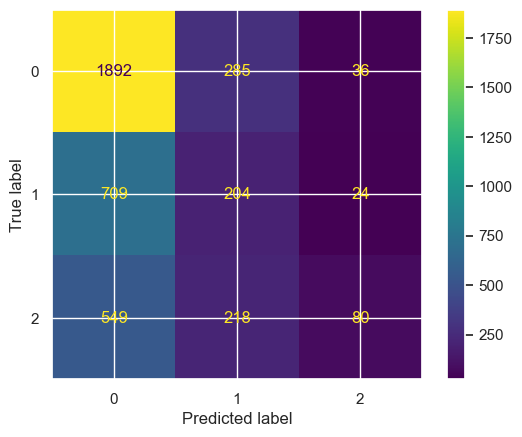

In [96]:
from sklearn.metrics import balanced_accuracy_score
bas_score = balanced_accuracy_score(y_va, y_pred)

print("ÊØîÈáç‰ªò„ÅçÁ≤æÂ∫¶Ôºö")
print(bas_score)

from sklearn.metrics import f1_score

valid_predictions = model_nc.predict(X_va)
valid_f1 = f1_score(y_va, y_pred, average='macro')

print("„Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö")
print(valid_f1)

# Ê∑∑ÂêàË°åÂàó - „É©„Éô„É´„ÅÆÊ≠£Ë™§„ÅÆÂàÜÈ°ûÊï∞„Çí„Åæ„Å®„ÇÅ„Çã
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_pred, y_va)
print("Ê∑∑ÂêàË°åÂàóÔºö")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0","1","2"])
disp.plot()
plt.show()

# „Ç¨„Ç¶„Ç∑„Ç¢„É≥„Éä„Ç§„Éº„Éñ„Éô„Ç§„Ç∫„Å´„Çà„Çã‰∫àÊ∏¨

In [102]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import balanced_accuracy_score

model_gnb = GaussianNB()
model_gnb.fit(X_tr, y_tr)

y_pred = model_gnb.predict(X_va)
y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

ÊØîÈáç‰ªò„ÅçÁ≤æÂ∫¶Ôºö
0.40078422127927077
„Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö
0.38913476429276367
Ê∑∑ÂêàË°åÂàóÔºö
[[2631  561   85]
 [ 389  103   24]
 [ 130   43   31]]


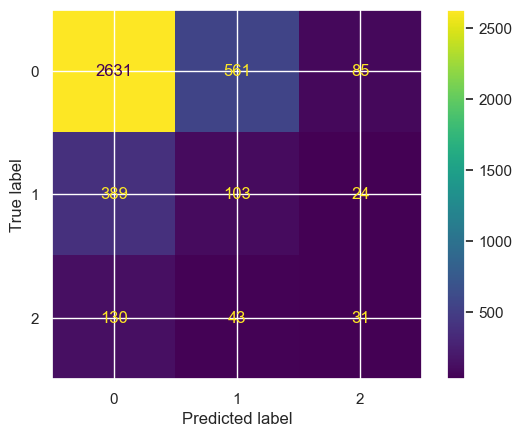

In [103]:
bas_score = balanced_accuracy_score(y_va, y_pred)

print("ÊØîÈáç‰ªò„ÅçÁ≤æÂ∫¶Ôºö")
print(bas_score)

from sklearn.metrics import f1_score

valid_predictions = model_gnb.predict(X_va)
valid_f1 = f1_score(y_va, y_pred, average='macro')

print("„Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö")
print(valid_f1)

# Ê∑∑ÂêàË°åÂàó - „É©„Éô„É´„ÅÆÊ≠£Ë™§„ÅÆÂàÜÈ°ûÊï∞„Çí„Åæ„Å®„ÇÅ„Çã
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_pred, y_va)
print("Ê∑∑ÂêàË°åÂàóÔºö")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0","1","2"])
disp.plot()
plt.show()

# PassiveAggressiveClassifier„Å´„Çà„Çã‰∫àÊ∏¨

ÊØîÈáç‰ªò„ÅçÁ≤æÂ∫¶Ôºö
0.35791241028864795
„Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö
0.3526461989808116
Ê∑∑ÂêàË°åÂàóÔºö
[[2957  636  110]
 [ 159   50   21]
 [  34   21    9]]


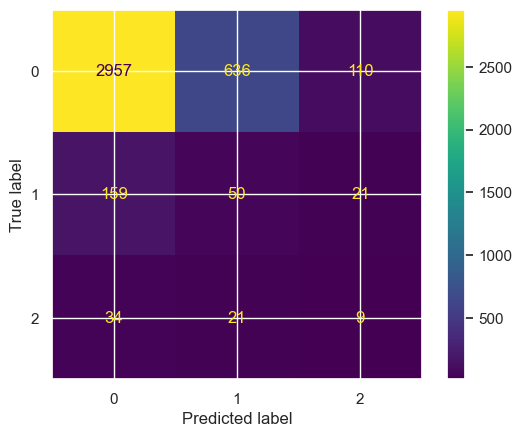

In [101]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import balanced_accuracy_score

model_pac = PassiveAggressiveClassifier()
model_pac.fit(X_tr, y_tr)

y_pred = model_pac.predict(X_va)
y_pred

bas_score = balanced_accuracy_score(y_va, y_pred)

print("ÊØîÈáç‰ªò„ÅçÁ≤æÂ∫¶Ôºö")
print(bas_score)

from sklearn.metrics import f1_score

valid_predictions = model_gnb.predict(X_va)
valid_f1 = f1_score(y_va, y_pred, average='macro')

print("„Éû„ÇØ„É≠f1„Çπ„Ç≥„Ç¢Ôºö")
print(valid_f1)

# Ê∑∑ÂêàË°åÂàó - „É©„Éô„É´„ÅÆÊ≠£Ë™§„ÅÆÂàÜÈ°ûÊï∞„Çí„Åæ„Å®„ÇÅ„Çã
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_pred, y_va)
print("Ê∑∑ÂêàË°åÂàóÔºö")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0","1","2"])
disp.plot()
plt.show()

# ÊäïÁ®øÁî®„Éá„Éº„Çø„Çí‰ΩúÊàê

In [104]:
# Ë™¨ÊòéÂ§âÊï∞„ÉªÁõÆÁöÑÂ§âÊï∞

# Êúà„ÉªÂπ¥„Éá„Éº„Çø„ÇíÂàÜÊûê„Å´Âê´„ÇÅ„Çã
test["datetime"] = pd.to_datetime(test["created_at"], format="%Y-%m-%d")
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["season"] = pd.Categorical(test["month"].apply(to_season))

test["avg_highf"] = test["month"].map(avg_highf) 
test["avg_lowf"] = test["month"].map(avg_lowf) 
test["days_prcp"] = test["month"].map(days_prcp) 
test["inch_prcp"] = test["month"].map(inch_prcp) 
test["hours_snsn"] = test["month"].map(hours_snsn) 

test.head(2)

# problems„ÇíboolÂ§âÊèõ ‚Üí ÂïèÈ°å„Åå„ÅÇ„Çã„ÅãÂê¶„Åã„ÅÆ„ÉÄ„Éü„ÉºÂ§âÊï∞„Å´„Åô„Çã
test['bool_problems'] = test['problems'].apply(lambda x: 0 if x=='NULL' else 1)

X_test = test[x_list]
X_test

# Ê¨†ÊêçÂÄ§Ë£úÂÆå
test.fillna('NULL', inplace=True)
X_test.fillna('NULL', inplace=True)

In [105]:
X_test = pd.get_dummies(X_test, columns = dummy_list, drop_first=False)
X_test

tree_dbh                        problems  bool_problems  \
19984        15                            NULL              1   
19985         5                            NULL              1   
19986         4                            NULL              1   
19987         7                            NULL              1   
19988         6                          Stones              1   
...         ...                             ...            ...   
39964         3                 StonesRootOther              1   
39965         9                            NULL              1   
39966        16                            NULL              1   
39967        24  RootOtherTrunkOtherBranchOther              1   
39968        25                          Stones              1   

              spc_common   nta  boro_ct       zip_city  cb_num  st_senate  \
19984       Callery pear  BK17  3062000       Brooklyn     315         22   
19985             cherry  BX62  2045101          Bronx     212         34   
19986  littleleaf linden  QN60  4013800    Kew Gardens     409         14   
19987       dawn redwood  BK09  3000301       Brooklyn     302         26   
19988   purple-leaf plum  BK75  3025100       Brooklyn     303         25   
...                  ...   ...      ...            ...     ...        ...   
39964  Japanese snowbell  SI45  5012200  Staten Island     502         24   
39965       silver maple  QN23  4093900  College Point     407         11   
39966       Callery pear  BX01  2039500          Bronx     206         33   
39967   London planetree  BK79  3037300       Brooklyn     316         25   
39968   London planetree  SI24  5017700  Staten Island     502         24   

       st_assem  ...  user_type_Volunteer  borocode_1  borocode_2  borocode_3  \
19984        45  ...                    0           0           0           1   
19985        81  ...                    1           0           1           0   
19986        27  ...                    1           0           0           0   
19987        52  ...                    0           0           0           1   
19988        56  ...                    0           0           0           1   
...         ...  ...                  ...         ...         ...         ...   
39964        64  ...                    1           0           0           0   
39965        27  ...                    0           0           0           0   
39966        86  ...                    1           0           1           0   
39967        55  ...                    0           0           0           1   
39968        63  ...                    0           0           0           0   

       borocode_4  borocode_5  season_autumn  season_spring  season_summer  \
19984           0           0              1              0              0   
19985           0           0              1              0              0   
19986           1           0              0              0              1   
19987           0           0              0              0              1   
19988           0           0              1              0              0   
...           ...         ...            ...            ...            ...   
39964           0           1              1              0              0   
39965           1           0              1              0              0   
39966           0           0              0              0              0   
39967           0           0              1              0              0   
39968           0           1              1              0              0   

       season_winter  
19984              0  
19985              0  
19986              0  
19987              0  
19988              0  
...              ...  
39964              0  
39965              0  
39966              1  
39967              0  
39968              0  

[19702 rows x 38 columns]

In [106]:
# ‰∏ÄÊåô„Å´„Çø„Éº„Ç≤„ÉÉ„Éà„Ç®„É≥„Ç≥„Éº„Éá„Ç£„É≥„Ç∞
for col in cols:
    column_means = train.groupby(col)["health"].mean("health")
    column_means
    
    colname = col + "_tg_enc"
    
    X_test[colname] = test[col].map(column_means)

In [107]:
# problems, spc_common„Çí„Éâ„É≠„ÉÉ„Éó„Ç¢„Ç¶„Éà
X_test = X_test.drop(drop_col , axis=1)
X_test

tree_dbh  bool_problems  hours_snsn  curb_loc_OffsetFromCurb  \
19984        15              1         235                        0   
19985         5              1         213                        0   
19986         4              1         271                        0   
19987         7              1         271                        0   
19988         6              1         213                        0   
...         ...            ...         ...                      ...   
39964         3              1         235                        0   
39965         9              1         235                        0   
39966        16              1         155                        0   
39967        24              1         235                        0   
39968        25              1         235                        0   

       curb_loc_OnCurb  steward_1or2  steward_3or4  steward_4orMore  \
19984                1             0             0                0   
19985                1             1             0                0   
19986                1             0             0                0   
19987                1             0             0                0   
19988                1             1             0                0   
...                ...           ...           ...              ...   
39964                1             1             0                0   
39965                1             1             0                0   
39966                1             0             0                0   
39967                1             0             0                0   
39968                1             0             0                0   

       steward_NULL  guards_Harmful  ...  nta_tg_enc  borocode_tg_enc  \
19984             1               0  ...        0.22             0.24   
19985             0               0  ...        0.34             0.25   
19986             1               0  ...        0.19             0.26   
19987             1               0  ...        0.15             0.24   
19988             0               0  ...        0.22             0.24   
...             ...             ...  ...         ...              ...   
39964             0               1  ...        0.25             0.25   
39965             0               0  ...        0.22             0.26   
39966             1               0  ...        0.23             0.25   
39967             1               0  ...        0.24             0.24   
39968             1               0  ...        0.33             0.25   

       boro_ct_tg_enc  zip_city_tg_enc  cb_num_tg_enc  st_senate_tg_enc  \
19984            0.32             0.24           0.21              0.25   
19985            0.25             0.25           0.30              0.25   
19986            0.25             0.18           0.21              0.22   
19987            0.06             0.24           0.21              0.21   
19988            0.16             0.24           0.22              0.23   
...               ...              ...            ...               ...   
39964            0.27             0.25           0.26              0.25   
39965            0.33             0.30           0.29              0.27   
39966            0.24             0.25           0.25              0.28   
39967            0.30             0.24           0.26              0.23   
39968            0.41             0.25           0.26              0.25   

       st_assem_tg_enc  cncldist_tg_enc  year_tg_enc  month_tg_enc  
19984             0.20             0.20         0.24          0.26  
19985             0.26             0.26         0.24          0.24  
19986             0.23             0.24         0.26          0.24  
19987             0.19             0.21         0.24          0.24  
19988             0.21             0.24         0.24          0.24  
...                ...              ...          ...           ...  
39964             0.27             0.26 

In [108]:
X_test.columns

Index(['tree_dbh', 'bool_problems', 'hours_snsn', 'curb_loc_OffsetFromCurb',
       'curb_loc_OnCurb', 'steward_1or2', 'steward_3or4', 'steward_4orMore',
       'steward_NULL', 'guards_Harmful', 'guards_Helpful', 'guards_NULL',
       'guards_Unsure', 'sidewalk_Damage', 'sidewalk_NoDamage',
       'user_type_NYC Parks Staff', 'user_type_TreesCount Staff',
       'user_type_Volunteer', 'borocode_1', 'borocode_2', 'borocode_3',
       'borocode_4', 'borocode_5', 'season_autumn', 'season_spring',
       'season_summer', 'season_winter', 'curb_loc_tg_enc', 'steward_tg_enc',
       'guards_tg_enc', 'sidewalk_tg_enc', 'user_type_tg_enc',
       'problems_tg_enc', 'spc_common_tg_enc', 'nta_tg_enc', 'borocode_tg_enc',
       'boro_ct_tg_enc', 'zip_city_tg_enc', 'cb_num_tg_enc',
       'st_senate_tg_enc', 'st_assem_tg_enc', 'cncldist_tg_enc', 'year_tg_enc',
       'month_tg_enc'],
      dtype='object')

In [109]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(X_test)
X_test_std = pd.DataFrame(std_scaler.transform(X_test), columns=X_train.columns)
X_test_std
# X_train_std.describe()

tree_dbh  bool_problems  hours_snsn  curb_loc_OffsetFromCurb  \
0          0.41           0.00       -0.11                    -0.26   
1         -0.80           0.00       -0.58                    -0.26   
2         -0.93           0.00        0.67                    -0.26   
3         -0.56           0.00        0.67                    -0.26   
4         -0.68           0.00       -0.58                    -0.26   
...         ...            ...         ...                      ...   
19697     -1.05           0.00       -0.11                    -0.26   
19698     -0.32           0.00       -0.11                    -0.26   
19699      0.54           0.00       -1.84                    -0.26   
19700      1.51           0.00       -0.11                    -0.26   
19701      1.63           0.00       -0.11                    -0.26   

       curb_loc_OnCurb  steward_1or2  steward_3or4  steward_4orMore  \
0                 0.26         -0.52         -0.23            -0.03   
1                 0.26          1.93         -0.23            -0.03   
2                 0.26         -0.52         -0.23            -0.03   
3                 0.26         -0.52         -0.23            -0.03   
4                 0.26          1.93         -0.23            -0.03   
...                ...           ...           ...              ...   
19697             0.26          1.93         -0.23            -0.03   
19698             0.26          1.93         -0.23            -0.03   
19699             0.26         -0.52         -0.23            -0.03   
19700             0.26         -0.52         -0.23            -0.03   
19701             0.26         -0.52         -0.23            -0.03   

       steward_NULL  guards_Harmful  ...  nta_tg_enc  borocode_tg_enc  \
0              0.60           -0.19  ...       -0.43            -0.89   
1             -1.68           -0.19  ...        1.82             0.04   
2              0.60           -0.19  ...       -1.13             1.25   
3              0.60           -0.19  ...       -1.93            -0.89   
4             -1.68           -0.19  ...       -0.58            -0.89   
...             ...             ...  ...         ...              ...   
19697         -1.68            5.35  ...        0.08            -0.14   
19698         -1.68           -0.19  ...       -0.42             1.25   
19699          0.60           -0.19  ...       -0.29             0.04   
19700          0.60           -0.19  ...       -0.21            -0.89   
19701          0.60           -0.19  ...        1.57            -0.14   

       boro_ct_tg_enc  zip_city_tg_enc  cb_num_tg_enc  st_senate_tg_enc  \
0                0.62            -0.29          -1.02              0.04   
1                0.05             0.01           1.47             -0.00   
2                0.05            -3.01          -1.14             -1.38   
3               -1.50            -0.29          -1.16             -1.54   
4               -0.71            -0.29          -0.83             -0.55   
...               ...              ...            ...               ...   
19697            0.21            -0.04           0.46              0.02   
19698            0.74             2.43           1.37              1.18   
19699           -0.07             0.01           0.10              1.36   
19700            0.47            -0.29           0.37             -0.55   
19701            1.35            -0.04           0.46              0.02   

       st_assem_tg_enc  cncldist_tg_enc  year_tg_enc  month_tg_enc  
0                -1.30            -1.48        -0.55          0.71  
1                 0.46             0.47        -0.55         -0.22  
2                -0.42            -0.15         1.80         -0.47  
3                -1.69            -1.20        -0.55         -0.47  
4                -1.08            -0.13        -0.55         -0.22  
...                ...              ...          ...           ...  
19697             0.81             0.40 

In [110]:
X_test_std = X_test_std[list]
X_test_std

tree_dbh  hours_snsn  curb_loc_OffsetFromCurb  curb_loc_OnCurb  \
0          0.41       -0.11                    -0.26             0.26   
1         -0.80       -0.58                    -0.26             0.26   
2         -0.93        0.67                    -0.26             0.26   
3         -0.56        0.67                    -0.26             0.26   
4         -0.68       -0.58                    -0.26             0.26   
...         ...         ...                      ...              ...   
19697     -1.05       -0.11                    -0.26             0.26   
19698     -0.32       -0.11                    -0.26             0.26   
19699      0.54       -1.84                    -0.26             0.26   
19700      1.51       -0.11                    -0.26             0.26   
19701      1.63       -0.11                    -0.26             0.26   

       steward_1or2  steward_3or4  steward_4orMore  steward_NULL  \
0             -0.52         -0.23            -0.03          0.60   
1              1.93         -0.23            -0.03         -1.68   
2             -0.52         -0.23            -0.03          0.60   
3             -0.52         -0.23            -0.03          0.60   
4              1.93         -0.23            -0.03         -1.68   
...             ...           ...              ...           ...   
19697          1.93         -0.23            -0.03         -1.68   
19698          1.93         -0.23            -0.03         -1.68   
19699         -0.52         -0.23            -0.03          0.60   
19700         -0.52         -0.23            -0.03          0.60   
19701         -0.52         -0.23            -0.03          0.60   

       guards_Harmful  guards_Helpful  ...  spc_common_tg_enc  nta_tg_enc  \
0               -0.19           -0.48  ...               0.26       -0.43   
1               -0.19           -0.48  ...              -0.67        1.82   
2               -0.19           -0.48  ...              -0.01       -1.13   
3               -0.19           -0.48  ...              -0.01       -1.93   
4               -0.19            2.07  ...              -0.05       -0.58   
...               ...             ...  ...                ...         ...   
19697            5.35           -0.48  ...               3.85        0.08   
19698           -0.19           -0.48  ...              -0.35       -0.42   
19699           -0.19           -0.48  ...               0.26       -0.29   
19700           -0.19           -0.48  ...              -0.35       -0.21   
19701           -0.19           -0.48  ...              -0.35        1.57   

       boro_ct_tg_enc  zip_city_tg_enc  cb_num_tg_enc  st_senate_tg_enc  \
0                0.62            -0.29          -1.02              0.04   
1                0.05             0.01           1.47             -0.00   
2                0.05            -3.01          -1.14             -1.38   
3               -1.50            -0.29          -1.16             -1.54   
4               -0.71            -0.29          -0.83             -0.55   
...               ...              ...            ...               ...   
19697            0.21            -0.04           0.46              0.02   
19698            0.74             2.43           1.37              1.18   
19699           -0.07             0.01           0.10              1.36   
19700            0.47            -0.29           0.37             -0.55   
19701            1.35            -0.04           0.46              0.02   

       st_assem_tg_enc  cncldist_tg_enc  year_tg_enc  month_tg_enc  
0                -1.30            -1.48        -0.55          0.71  
1                 0.46             0.47        -0.55         -0.22  
2                -0.42            -0.15         1.80         -0.47  
3                -1.69            -1.20        -0.55         -0.47  
4                -1.08            -0.13        -0.55         -0.22  
...                ...              ...          ...           ...  
1969

In [111]:
# ‰∫àÊ∏¨
y_test_pred = model_gnb.predict(X_test_std)

# NOTE ‰∫àÊ∏¨ÁµêÊûú„Çí1Ê¨°ÂÖÉ„Éô„ÇØ„Éà„É´„Å´„Åô„Çã
y_test_pred = np.squeeze(y_test_pred)
y_test_pred.shape

# NOTE ‰∫àÊ∏¨ÁµêÊûú„Çípd„Å´„Åó„Å¶Âá¶ÁêÜ
df_submit = pd.DataFrame(data=y_test_pred, columns=['y_pred'])
df_submit

y_pred
0           0
1           0
2           0
3           0
4           0
...       ...
19697       1
19698       0
19699       0
19700       0
19701       0

[19702 rows x 1 columns]

In [112]:
df_submit.value_counts()

y_pred
0         15974
1          2806
2           922
dtype: int64

In [113]:
df_submit['y_pred'] = df_submit['y_pred'].map({0:1, 1:0, 2:2})
df_submit

y_pred
0           1
1           1
2           1
3           1
4           1
...       ...
19697       0
19698       1
19699       1
19700       1
19701       1

[19702 rows x 1 columns]

In [114]:
df_submit.value_counts()

y_pred
1         15974
0          2806
2           922
dtype: int64

In [115]:
y_test_pred = df_submit["y_pred"].to_numpy()

In [116]:
sample_submit[1] = y_test_pred
sample_submit

1
0       
19984  1
19985  1
19986  1
19987  1
19988  1
...   ..
39964  0
39965  1
39966  1
39967  1
39968  1

[19702 rows x 1 columns]

In [117]:
#Êú®„ÅÆÂÅ•Â∫∑Áä∂ÊÖã„Çí0„Éª1„ÇíÁΩÆ„ÅçÊèõ„Åà„Çã
#train['health'] = train['health'].map({0:1, 1:0, 2:2})
#train

sample_submit.to_csv('submit_35_GNB_DateData+SunHours.csv', header=None)

# Â•ΩÊàêÁ∏æ„Éï„Ç°„Ç§„É´„Çí„Ç¢„É≥„Çµ„É≥„Éñ„É™„É≥„Ç∞

In [ ]:
import numpy as np
import pandas as pd
import os
import pickle
import gc

# ÂàÜÂ∏ÉÁ¢∫Ë™ç„Å´‰Ωø„ÅÜ
#import pandas_profiling as pdp
# ÂèØË¶ñÂåñ
import matplotlib.pyplot as plt
# ÂâçÂá¶ÁêÜ„ÄÅÁâπÂæ¥Èáè‰ΩúÊàê - sklearn„Çí‰Ωø„ÅÜ
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
# „É¢„Éá„É™„É≥„Ç∞„ÉªÁ≤æÂ∫¶„Å®Ë©ï‰æ°ÊåáÊ®ô
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
#LGBM
import lightgbm as lgb

# NOTE matplot„Åß„ÅÆÊó•Êú¨Ë™ûÊñáÂ≠óÂåñ„Åë„ÇíËß£Ê∂à
#pip install japanize-matplotlib
import japanize_matplotlib
%matplotlib inline

import pandas as pd
pd.options.display

In [ ]:
sub01 = pd.read_csv("submit_35_GNB_DateData_Enc+Dammy+Season.csv",index_col=0, header=None)
sub01.head(10)

In [ ]:
sub01.value_counts()

In [ ]:
sub02 = pd.read_csv("submit_35_GNB_DateData_Enc+Dammy+Season_NoYear.csv",index_col=0, header=None)
sub02.value_counts()

In [ ]:
sub03 = pd.read_csv("submit_32_GNB_DateData_Enc+Dammy02.csv",index_col=0, header=None)
sub03.value_counts()

In [ ]:
sub04 = pd.read_csv("submit_30_GNB_DateData_Enc.csv",index_col=0, header=None)
sub04.value_counts()

In [ ]:
sub05 = pd.read_csv("submit_32_GNB_DateData_Enc+Dammy.csv",index_col=0, header=None)
sub05.value_counts()

In [ ]:
sub06 = pd.read_csv("submit_25_GNB_DateData_Enc+Dammy+TMS_TEncOnly.csv",index_col=0, header=None)
sub06.value_counts()

In [ ]:
sub07 = pd.read_csv("submit_PassiveAggressiveClassifier_01.csv",index_col=0, header=None)
sub07.value_counts()

In [ ]:
sub01[2] = sub02[1]
#sub01[3] = sub03[1]

#sub01[4] = sub04[1]
#sub01[5] = sub05[1]

sub01.head(5)

In [ ]:
sub01.head(100)

In [ ]:
sub01

In [ ]:
modes = sub01.mode(axis=1)
modes

In [ ]:
modes[0].value_counts()

In [ ]:
modes[0] = modes[0].astype("int")

In [ ]:
modes.info()

In [ ]:
modes[0].value_counts()

In [ ]:
sample_submit[1] = modes[0]
sample_submit

In [ ]:
#Êú®„ÅÆÂÅ•Â∫∑Áä∂ÊÖã„Çí0„Éª1„ÇíÁΩÆ„ÅçÊèõ„Åà„Çã
#train['health'] = train['health'].map({0:1, 1:0, 2:2})
#train

sample_submit.to_csv('submit_Ensembled04.csv', header=None)